<a href="https://colab.research.google.com/github/imtiaz114/Brain_tumor_detection_from_2D_MRI_images/blob/main/Brain_tumor_preprocessing_for_ML_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image preprocessing

Proposed Methodology:

1. Skull stripping
        Thresholding
        Connected Component Analysis
2. Filtering and Enhancement
3. Segmentation using Kmeans
4. Morphological Operations
5. Tumor Contouring

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from google.colab.patches import cv2_imshow
%matplotlib inline

## 1. Skull stripping

### Thresholding

In [ ]:
image_name = 'Y100'

image_directory_yes = '/content/drive/MyDrive/datasets/brain_tumor/brain_tumor_dataset_1/brain_tumor_dataset/yes_m' + '/'

#this img_file is the variable, changing it will set image name everywhere needed
img_file = image_directory_yes + image_name + '.jpg'

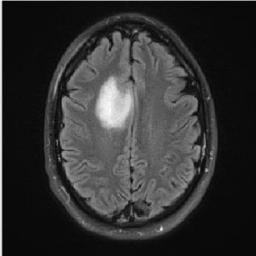

In [ ]:
# loading image
img = cv2.imread(img_file)
dim = (256,256)
image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(image)

In [ ]:
#normalizing image
image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
image = image.astype(np.uint8)

In [ ]:
#thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#thresh = cv2.threshold(gray, 0, 255,	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.adaptiveThreshold(gray, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,0)

### Connected component analysis

In [ ]:
#connected component analysis
connectivity = 8
output = cv2.connectedComponentsWithStats(
	thresh, connectivity, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output
mask = np.zeros(gray.shape, dtype="uint8")

#looping over unique labels
x = np.zeros(numLabels)
y = np.zeros(numLabels)
h = np.zeros(numLabels)
w = np.zeros(numLabels)
area = np.zeros(numLabels)

for i in range(1, numLabels): #id 0  background
	# extract the connected component statistics for the current
	# label
	x[i] = stats[i, cv2.CC_STAT_LEFT]
	y[i] = stats[i, cv2.CC_STAT_TOP]
	w[i] = stats[i, cv2.CC_STAT_WIDTH]
	h[i] = stats[i, cv2.CC_STAT_HEIGHT]
	area[i] = stats[i, cv2.CC_STAT_AREA]

In [ ]:
#ensure the width, height and area are not too small not too big
components =np.zeros(((numLabels,image.shape[0],image.shape[1])),dtype = np.uint8)
index = []
for i in range(1,numLabels):
  keepWidth = w[i]>0
  keepHeight = h[i]>0
  keepArea = area[i]>0
  if all((keepWidth,keepHeight,keepArea)):
    #construct a mask for the connected components and then take the bitwise OR
    # with the mask
    #print("[INFO] keeping connected components '{}'".format(i))
    componentMask = (labels == i).astype('uint8')*255
    mask = cv2.bitwise_or(mask,componentMask)
    components[i,:,:] = mask
    index.append(i)

1


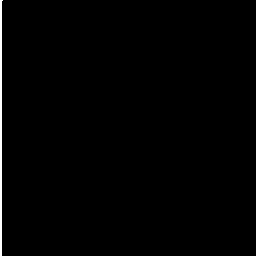

2


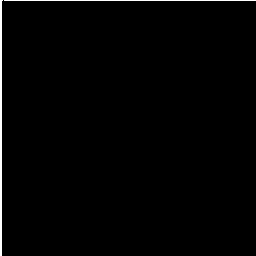

3


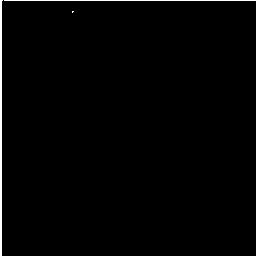

4


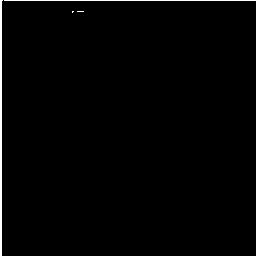

5


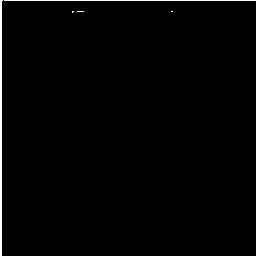

6


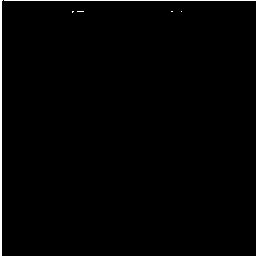

7


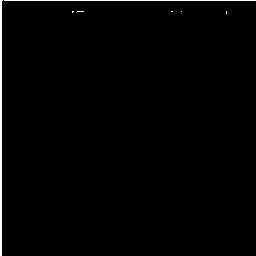

8


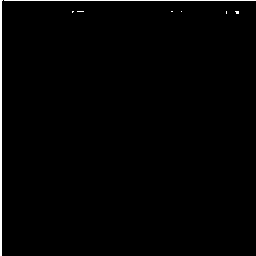

9


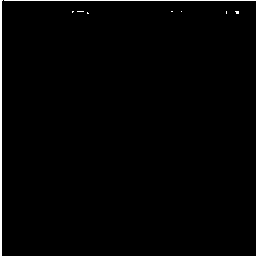

10


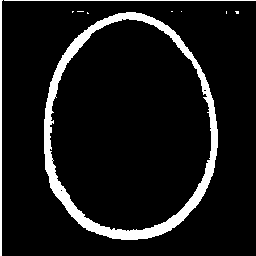

11


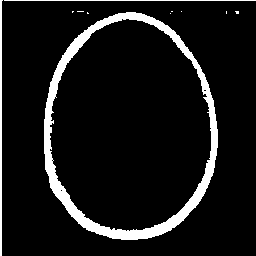

12


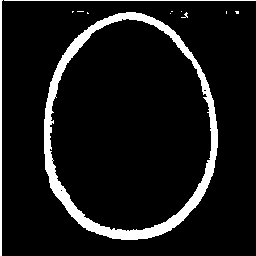

13


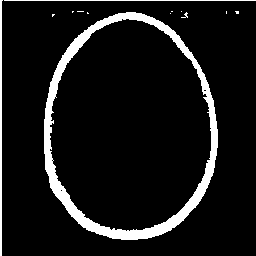

14


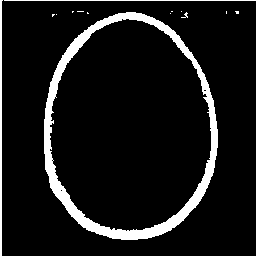

15


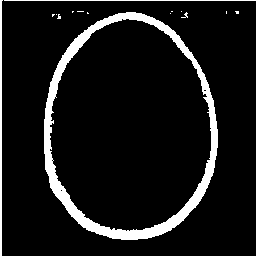

16


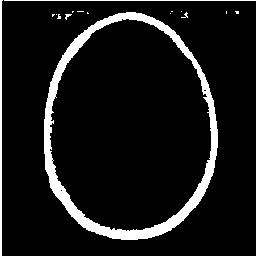

17


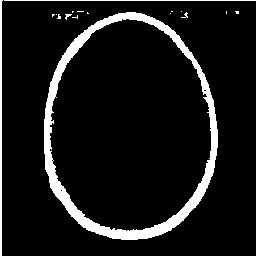

18


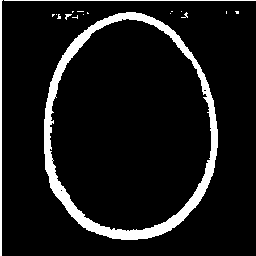

19


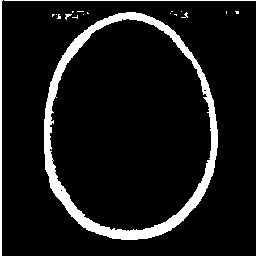

20


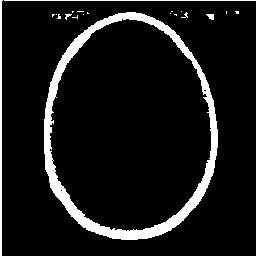

21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


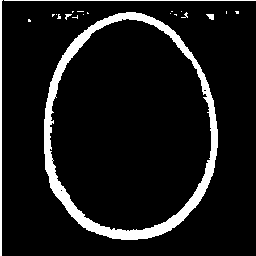

22


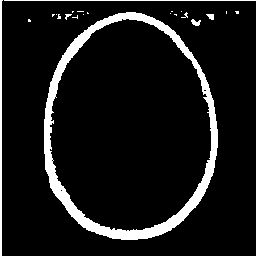

23


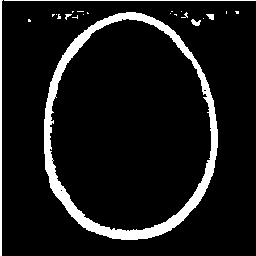

24


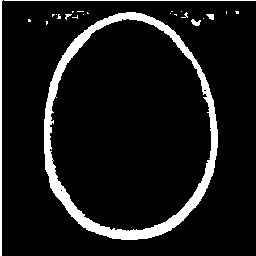

25


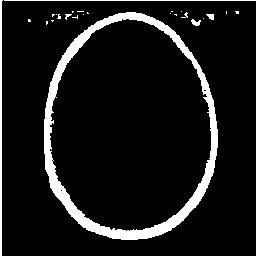

26


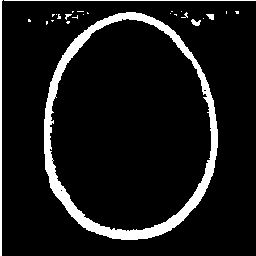

27


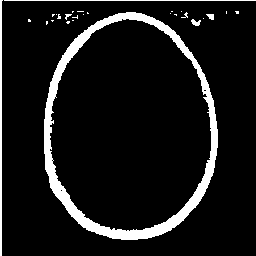

28


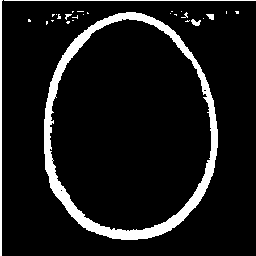

29


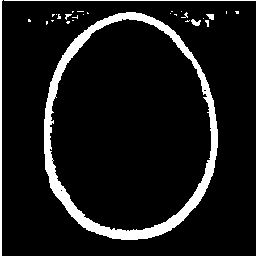

30


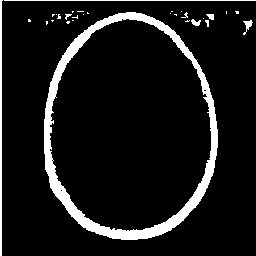

31


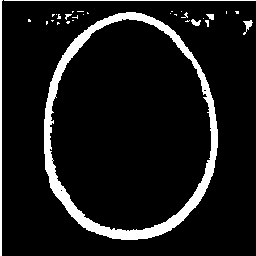

32


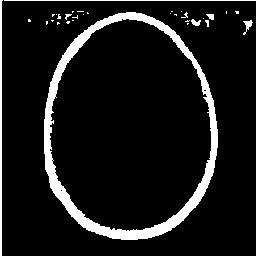

33


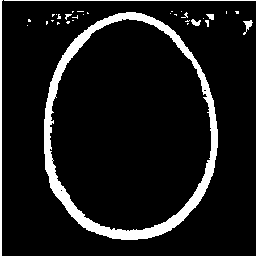

34


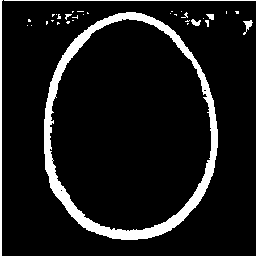

35


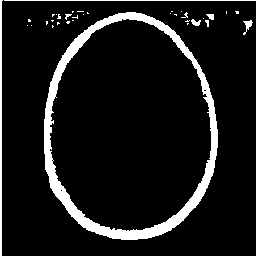

36


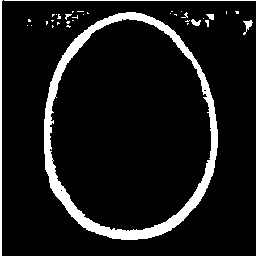

37


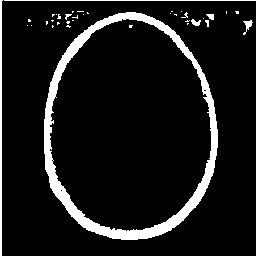

38


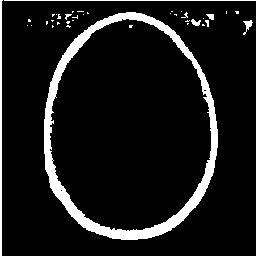

39


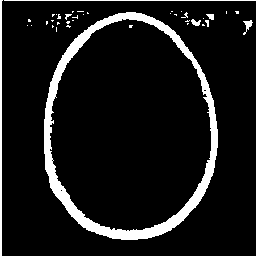

40


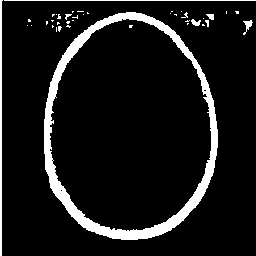

41


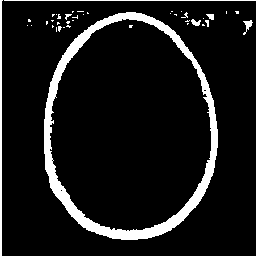

42


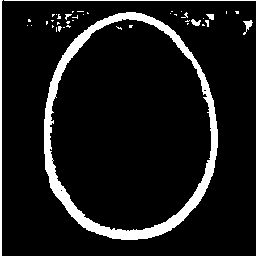

43


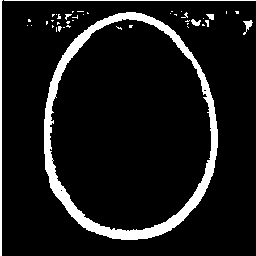

44


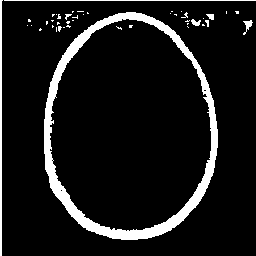

45


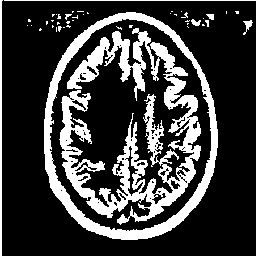

46


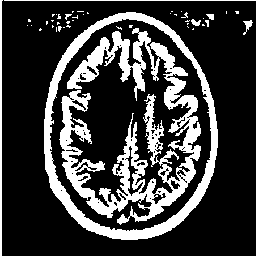

47


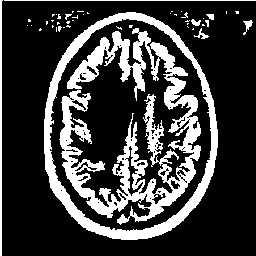

48


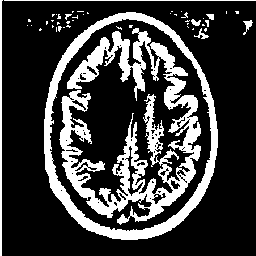

49


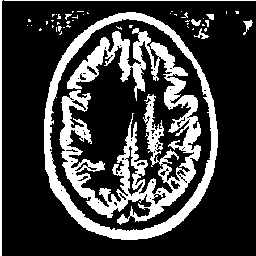

50


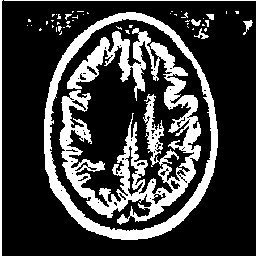

51


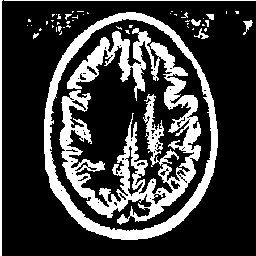

52


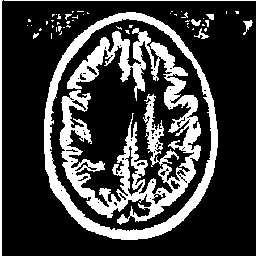

53


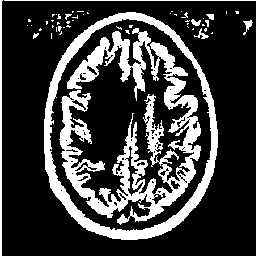

54


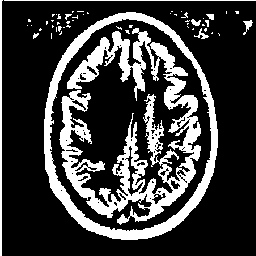

55


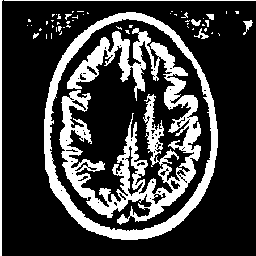

56


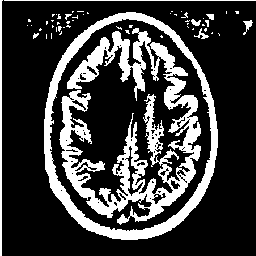

57


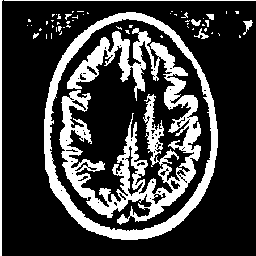

58


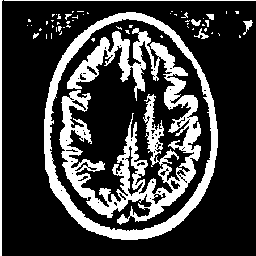

59


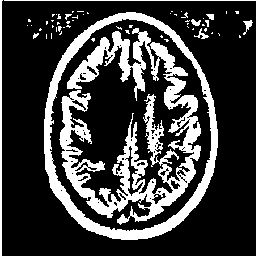

60


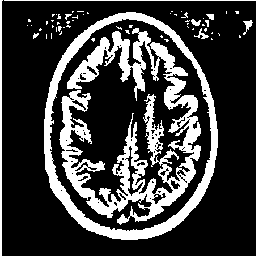

61


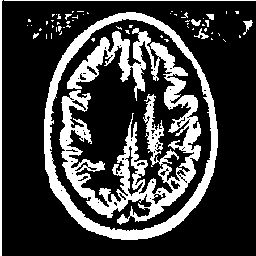

62


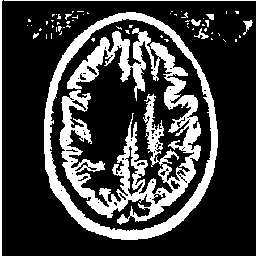

63


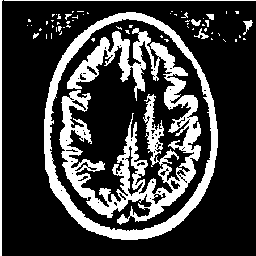

64


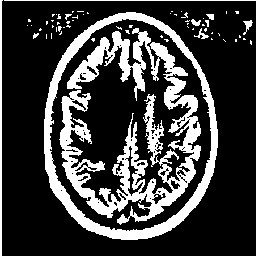

65


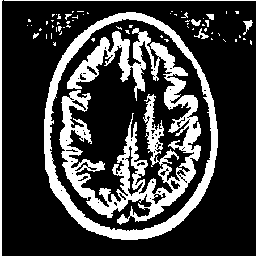

66


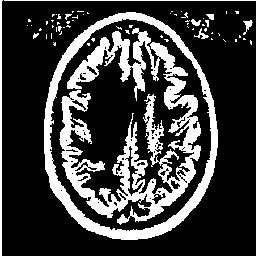

67


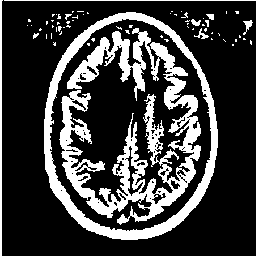

68


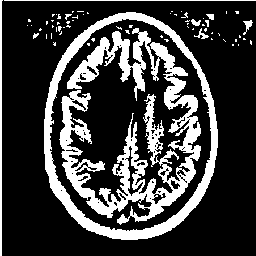

69


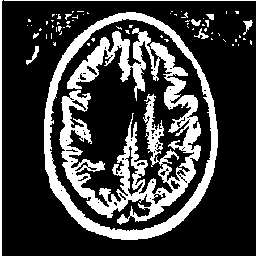

70


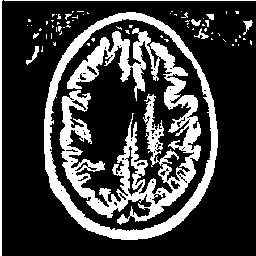

71


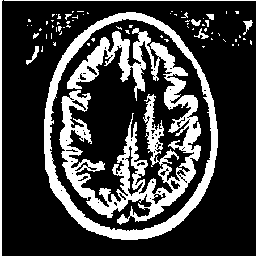

72


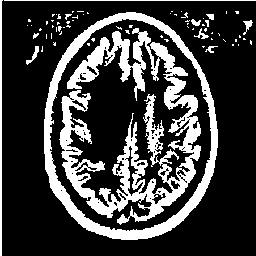

73


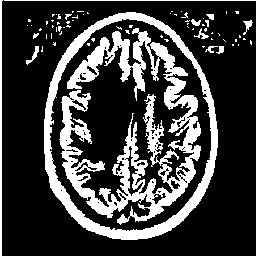

74


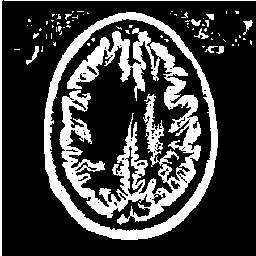

75


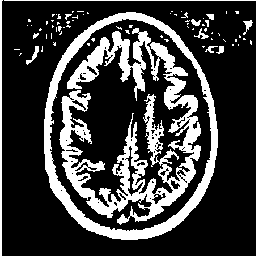

76


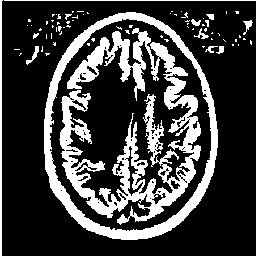

77


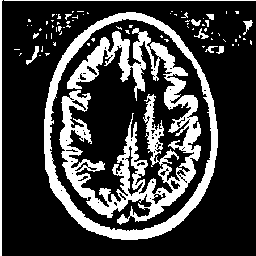

78


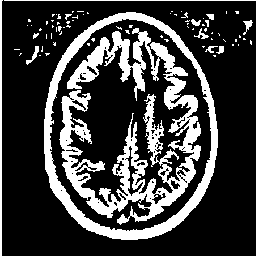

79


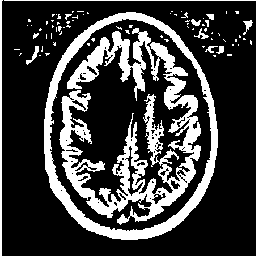

80


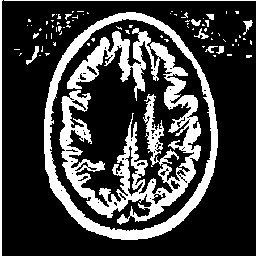

81


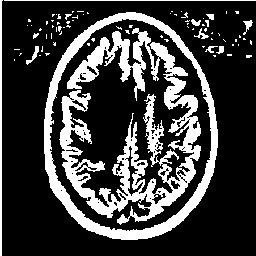

82


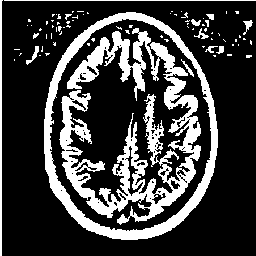

83


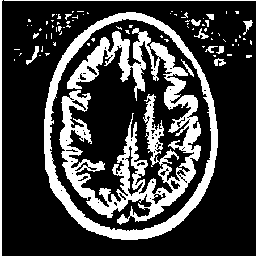

84


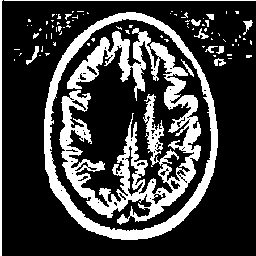

85


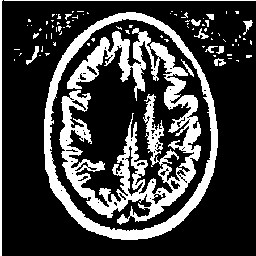

86


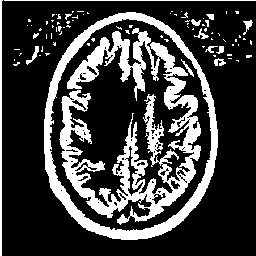

87


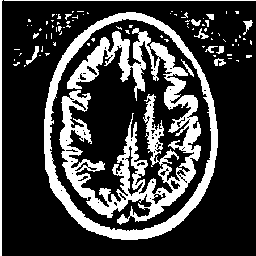

88


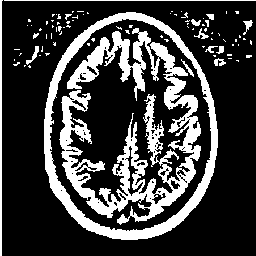

89


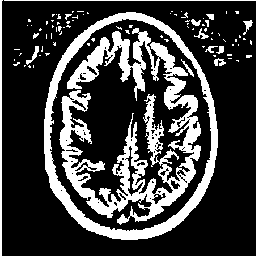

90


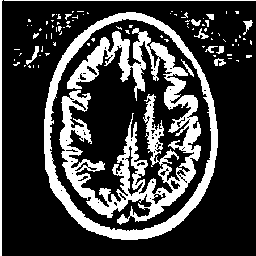

91


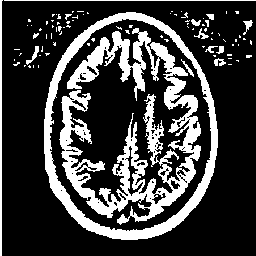

92


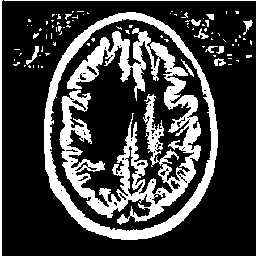

93


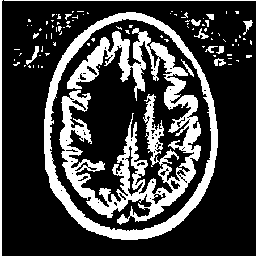

94


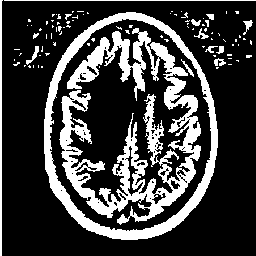

95


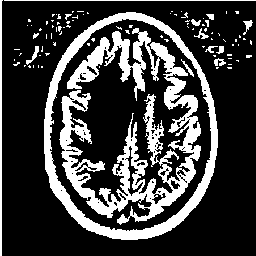

96


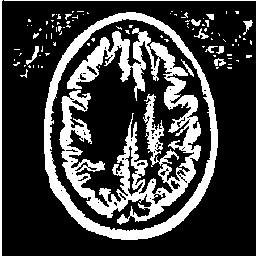

97


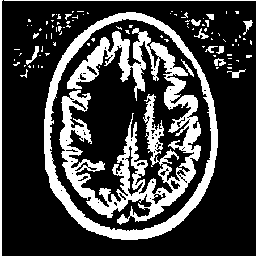

98


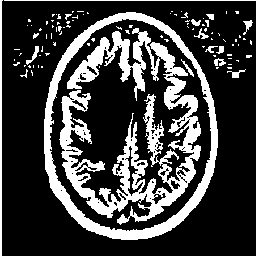

99


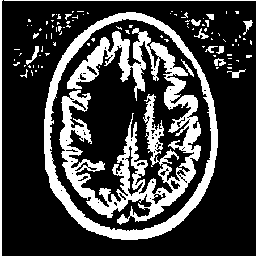

100


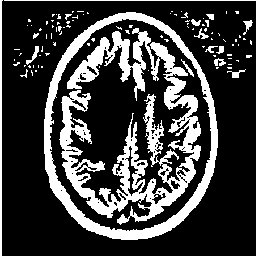

101


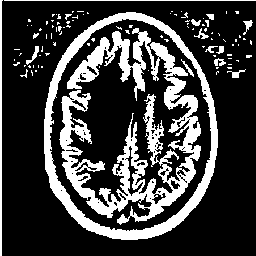

102


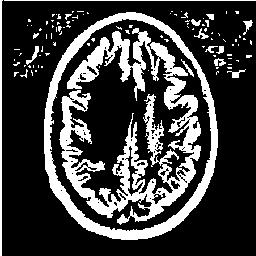

103


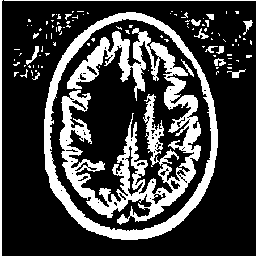

104


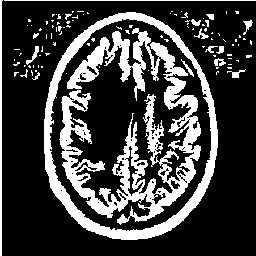

105


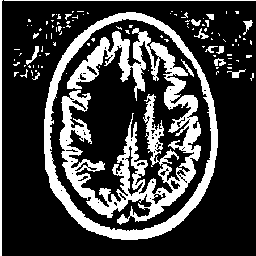

106


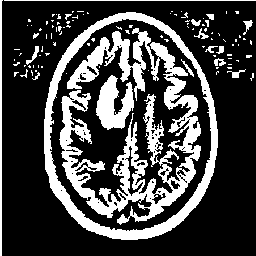

107


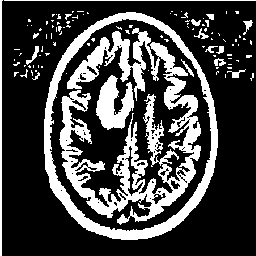

108


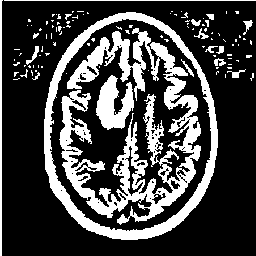

109


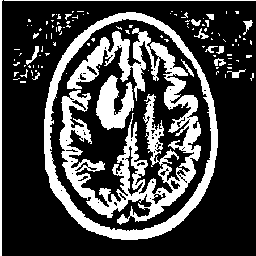

110


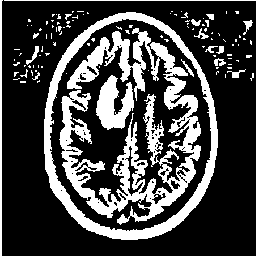

111


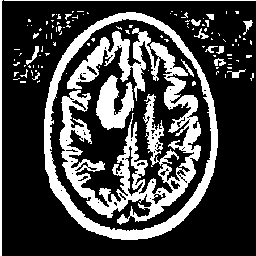

112


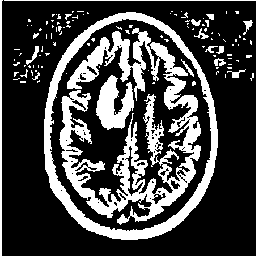

113


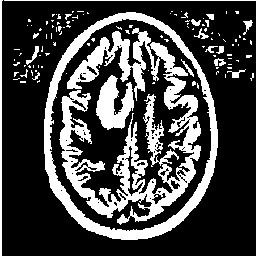

114


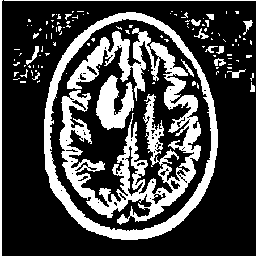

115


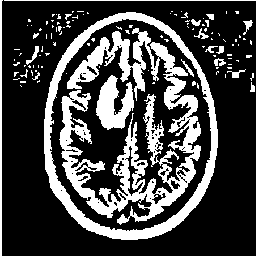

116


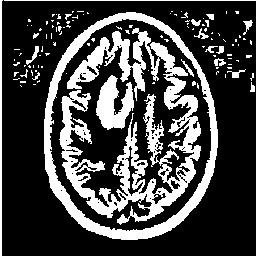

117


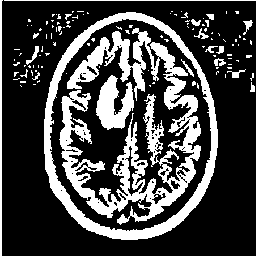

118


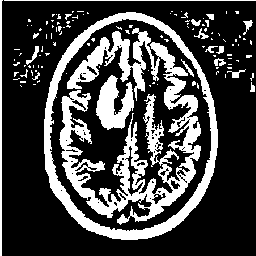

119


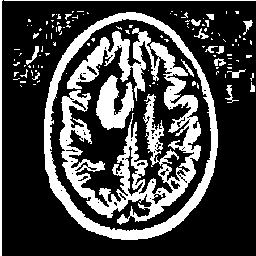

120


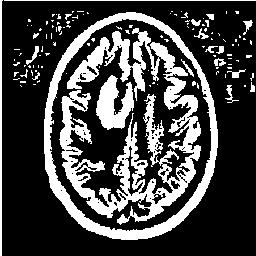

121


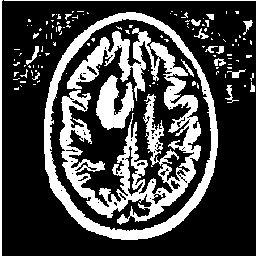

122


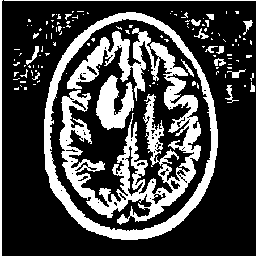

123


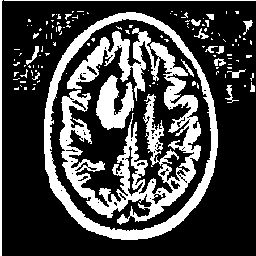

124


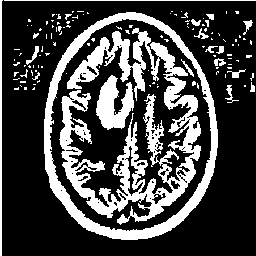

125


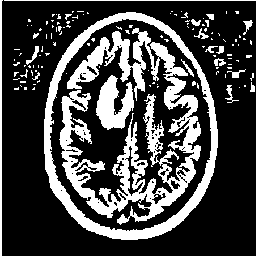

126


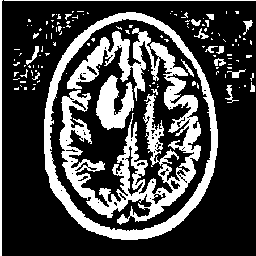

127


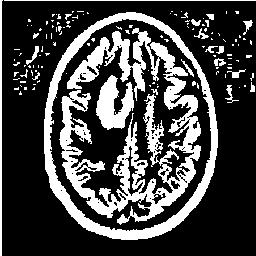

128


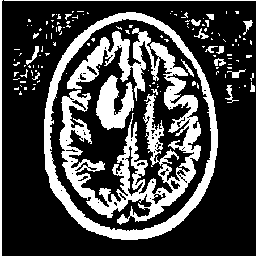

129


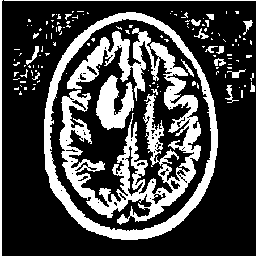

130


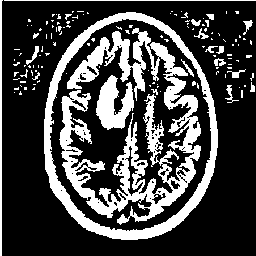

131


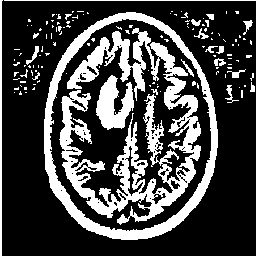

132


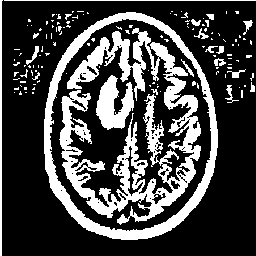

133


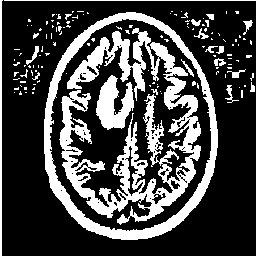

134


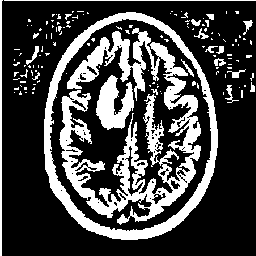

135


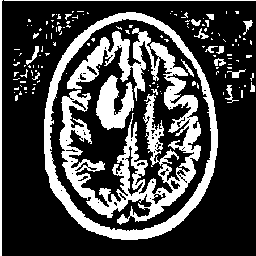

136


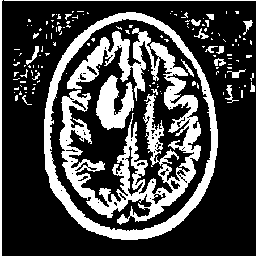

137


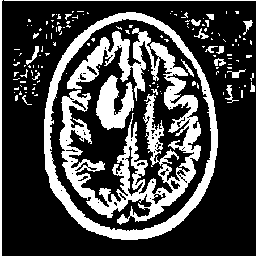

138


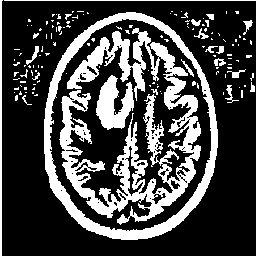

139


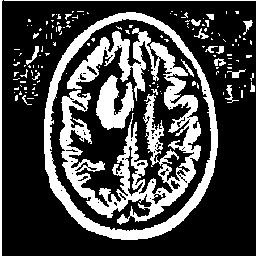

140


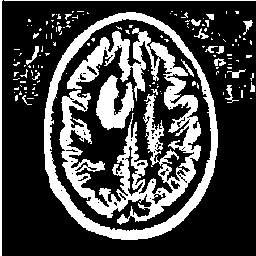

141


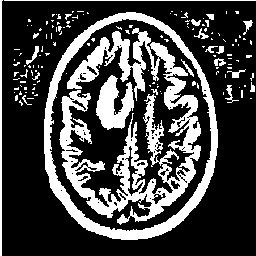

142


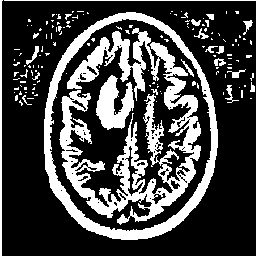

143


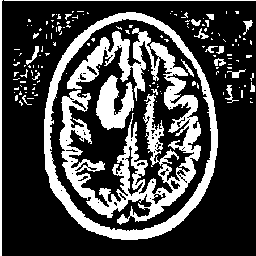

144


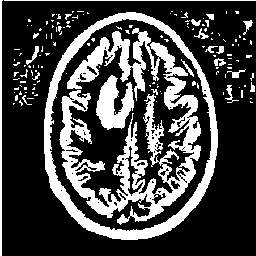

145


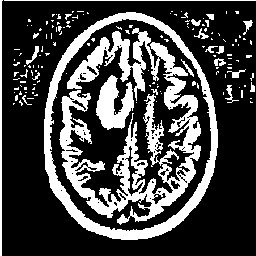

146


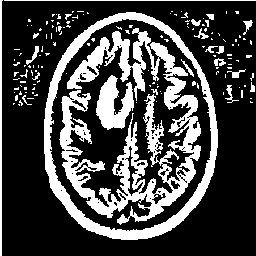

147


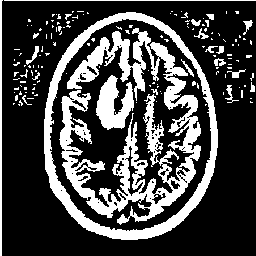

148


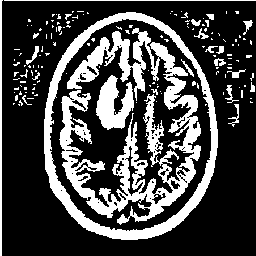

149


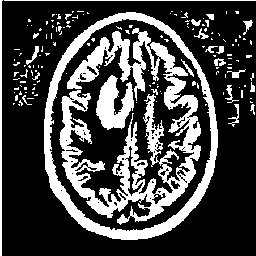

150


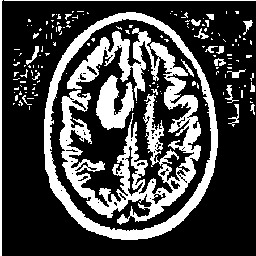

151


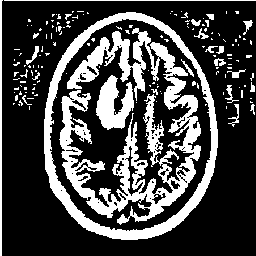

152


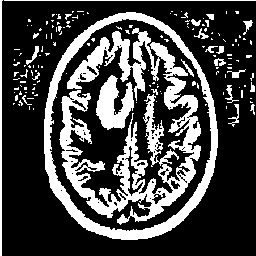

153


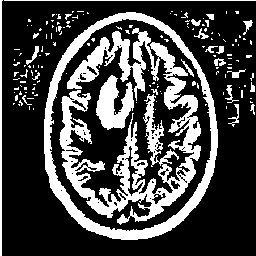

154


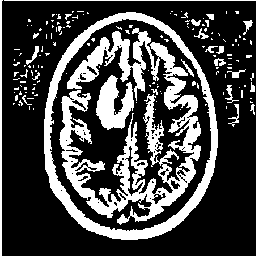

155


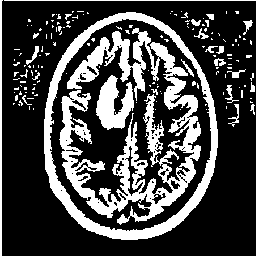

156


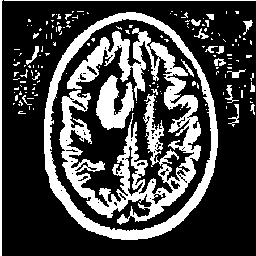

157


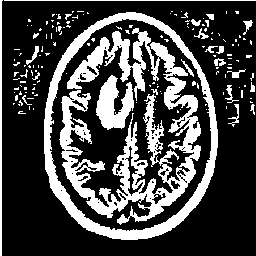

158


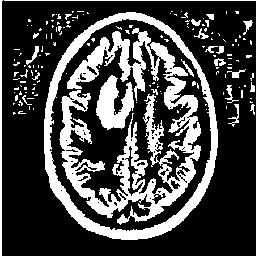

159


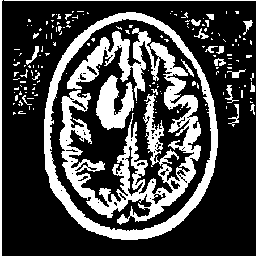

160


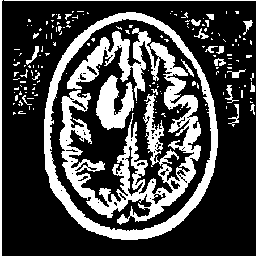

161


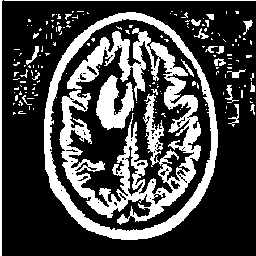

162


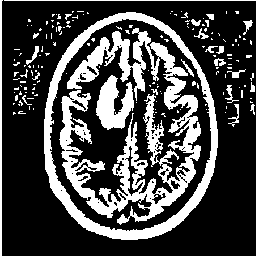

163


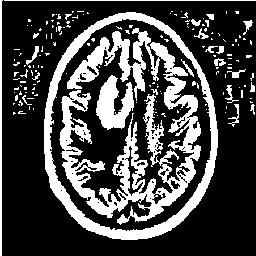

164


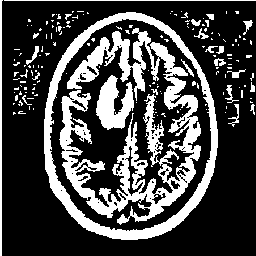

165


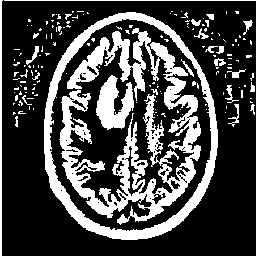

166


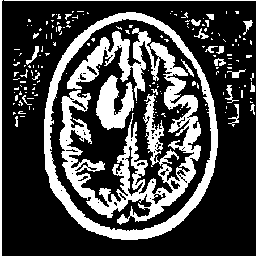

167


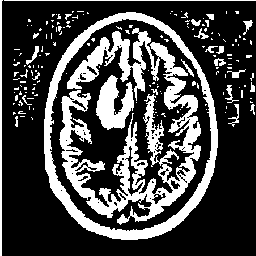

168


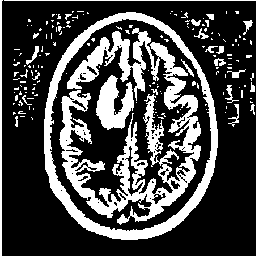

169


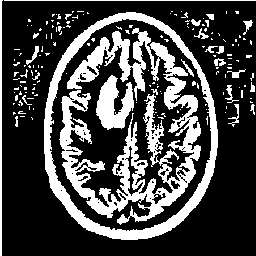

170


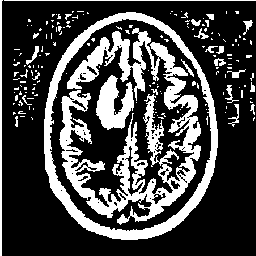

171


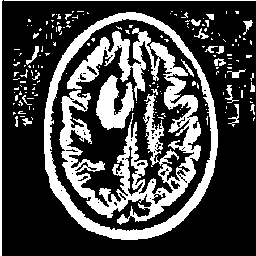

172


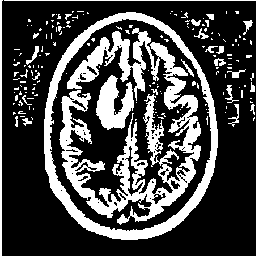

173


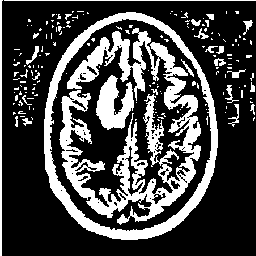

174


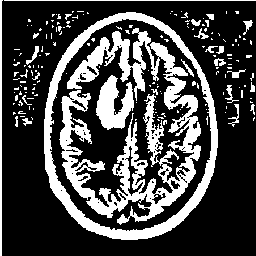

175


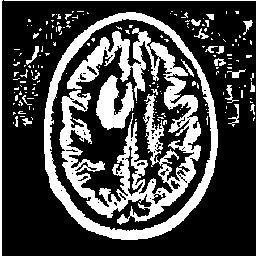

176


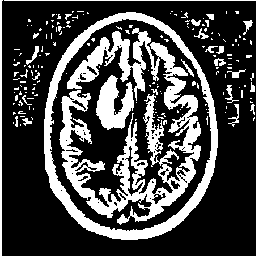

177


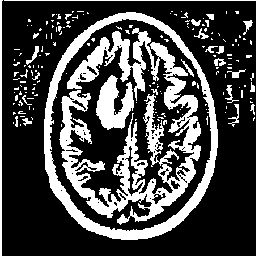

178


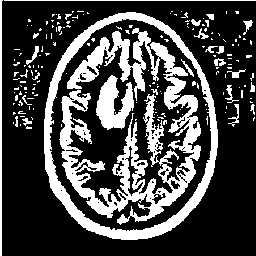

179


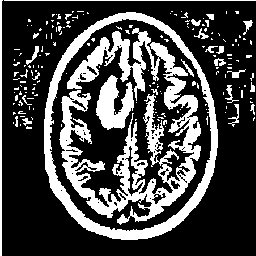

180


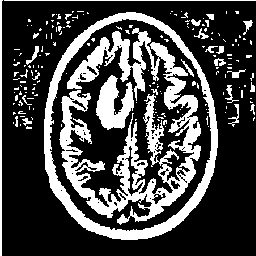

181


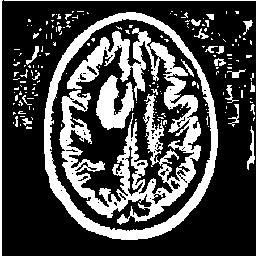

182


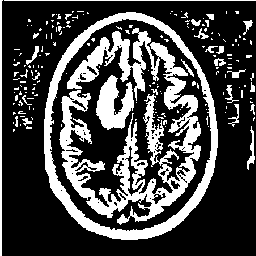

183


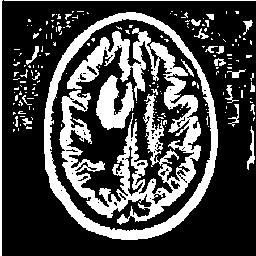

184


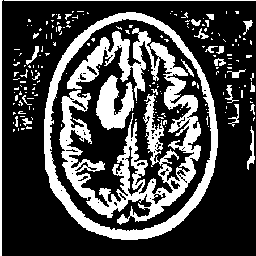

185


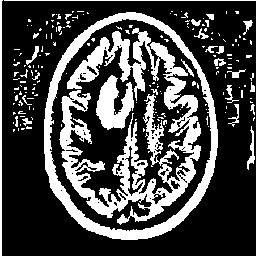

186


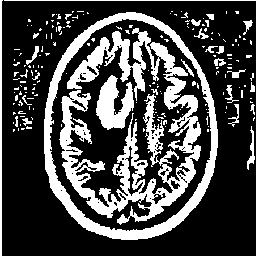

187


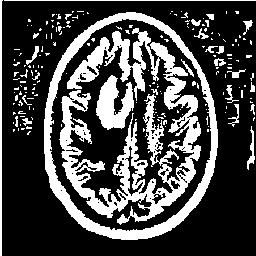

188


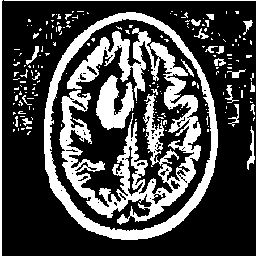

189


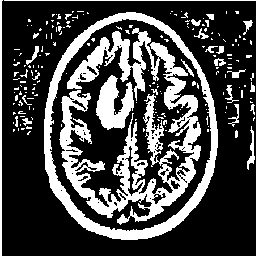

190


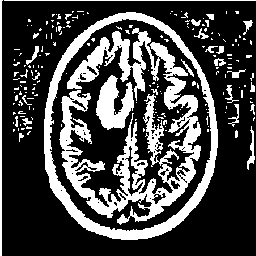

191


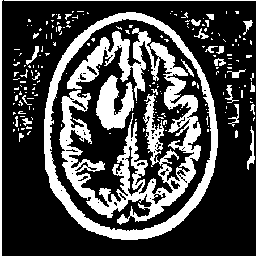

192


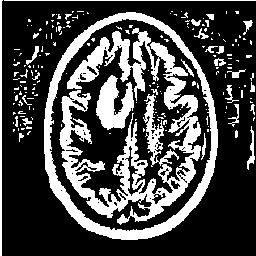

193


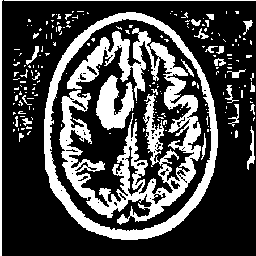

194


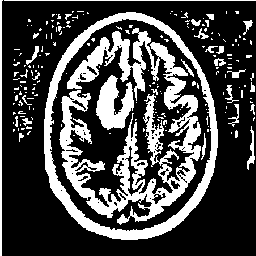

195


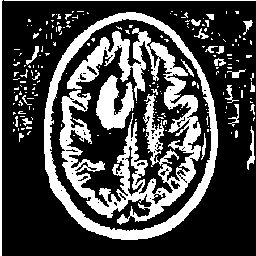

196


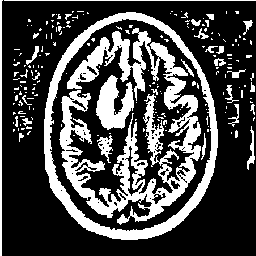

197


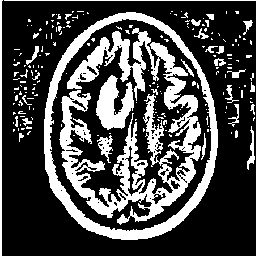

198


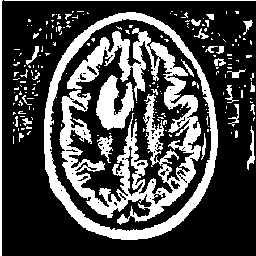

199


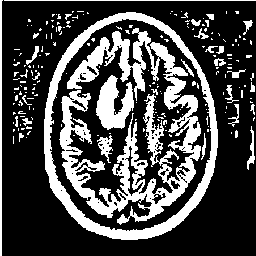

200


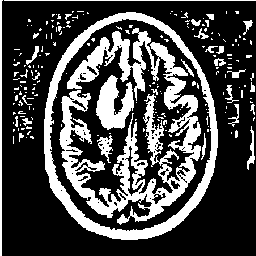

201


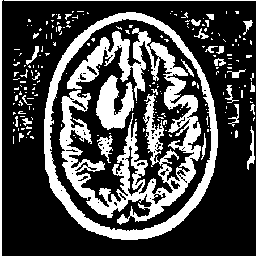

202


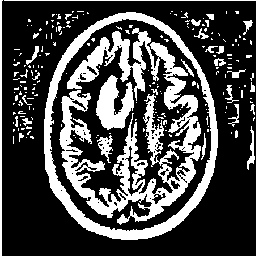

203


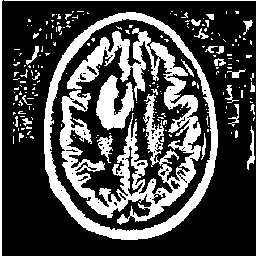

204


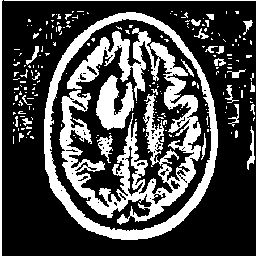

205


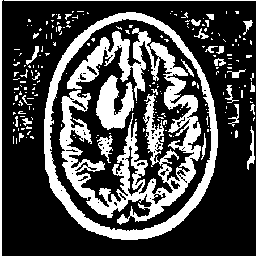

206


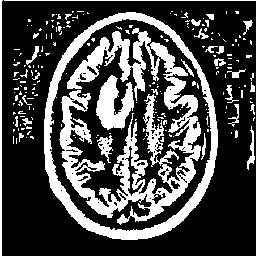

207


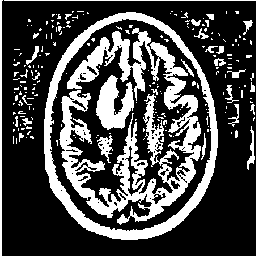

208


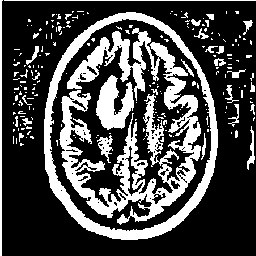

209


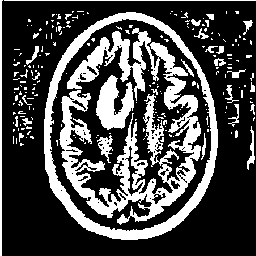

210


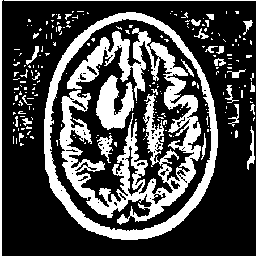

211


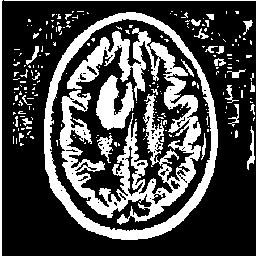

212


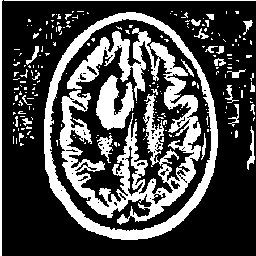

213


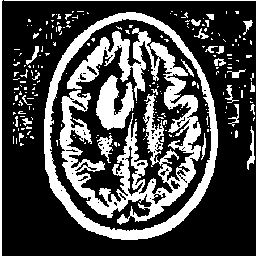

214


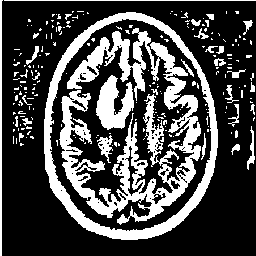

215


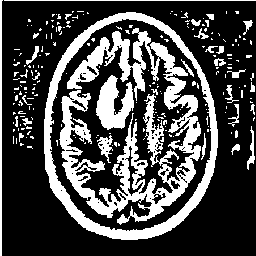

216


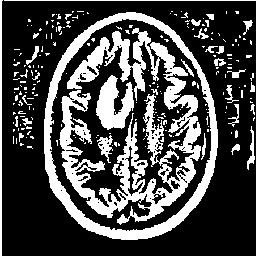

217


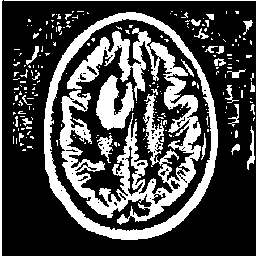

218


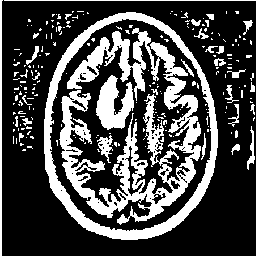

219


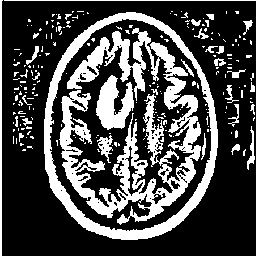

220


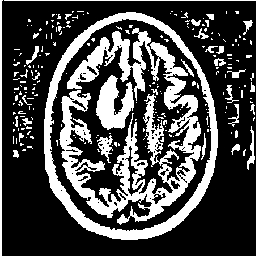

221


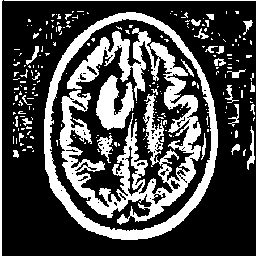

222


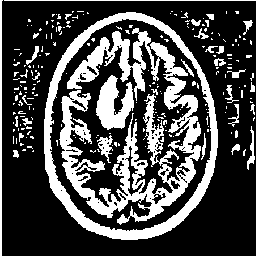

223


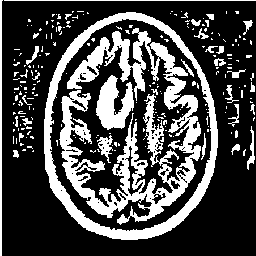

224


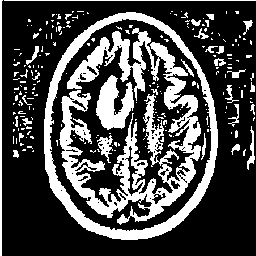

225


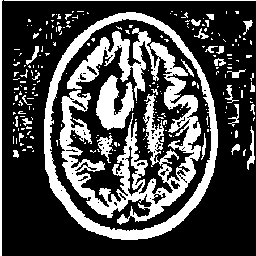

226


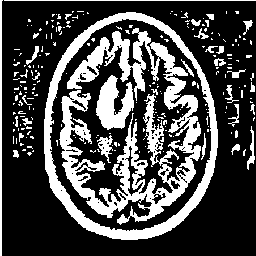

227


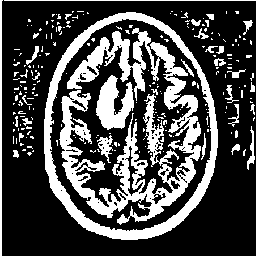

228


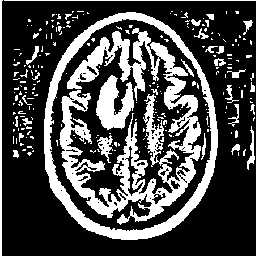

229


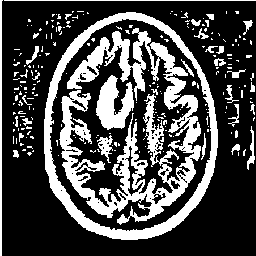

230


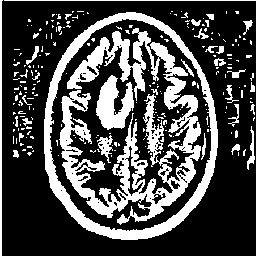

231


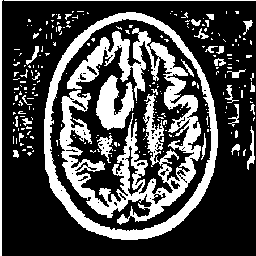

232


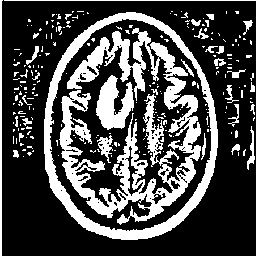

233


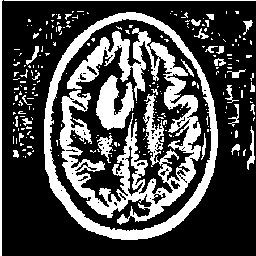

234


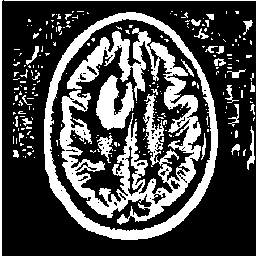

235


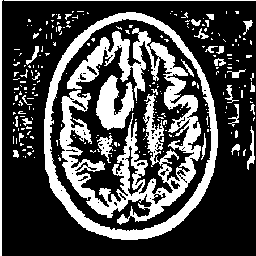

236


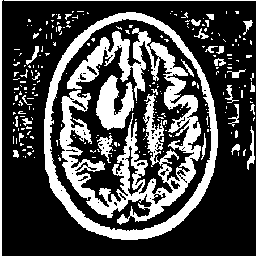

237


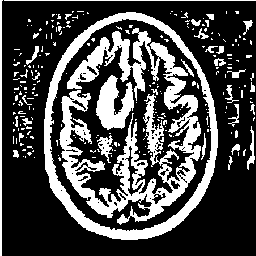

238


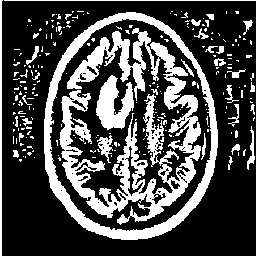

239


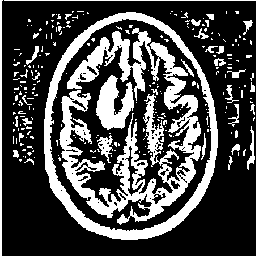

240


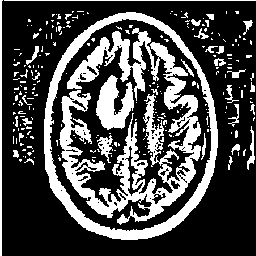

241


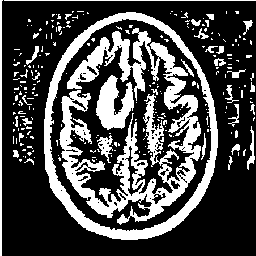

242


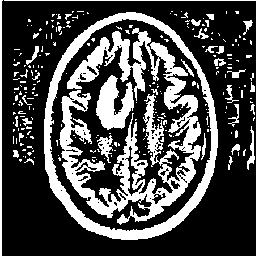

243


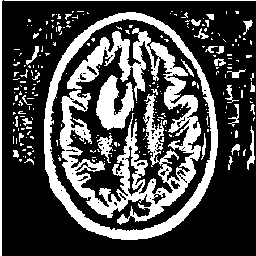

244


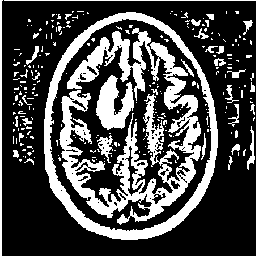

245


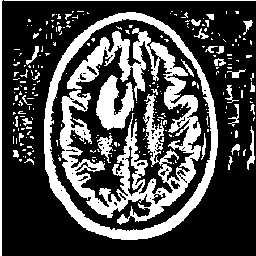

246


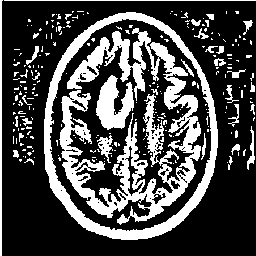

247


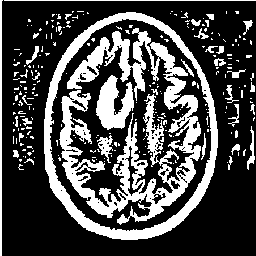

248


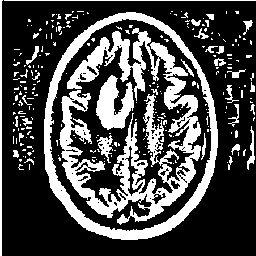

249


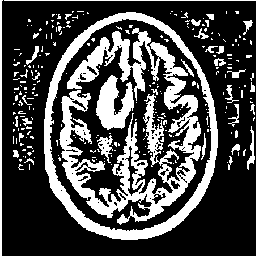

250


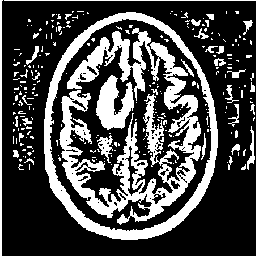

251


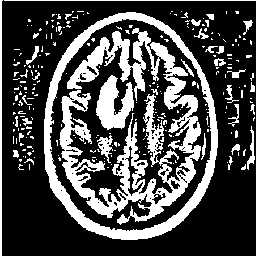

252


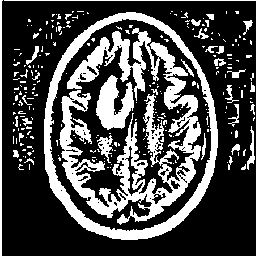

253


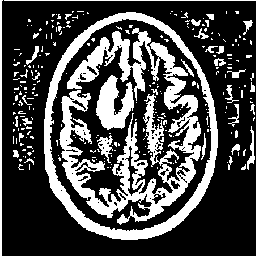

254


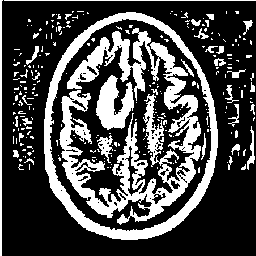

255


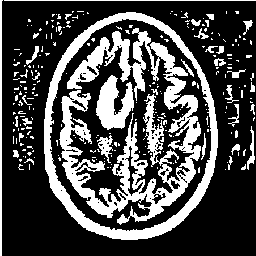

256


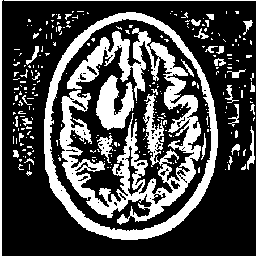

257


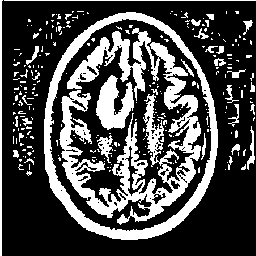

258


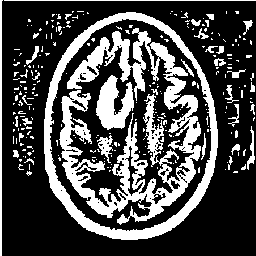

259


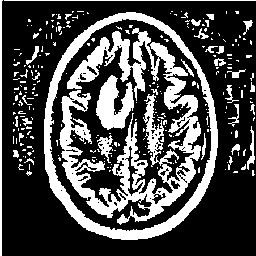

260


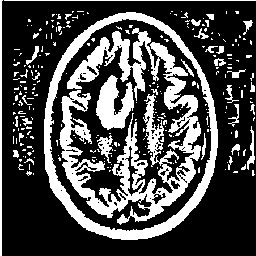

261


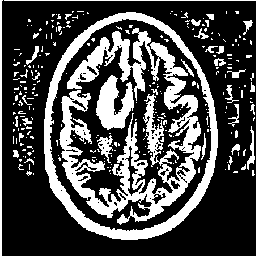

262


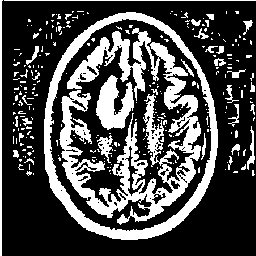

263


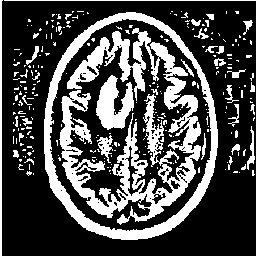

264


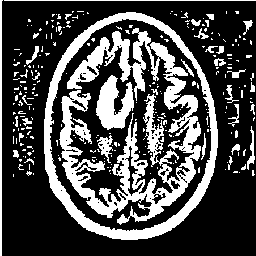

265


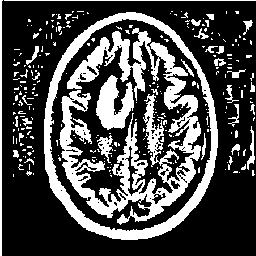

266


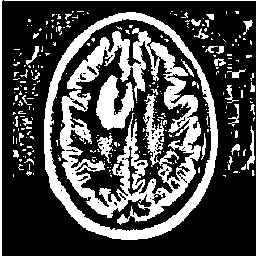

267


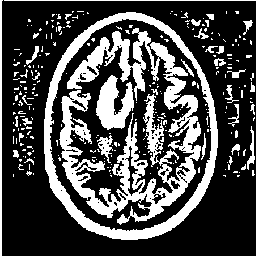

268


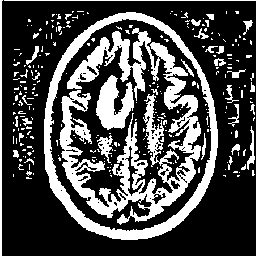

269


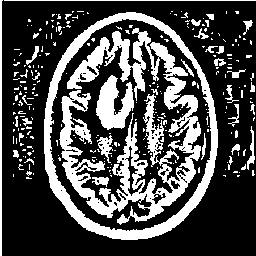

270


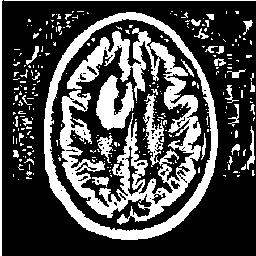

271


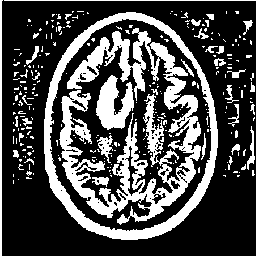

272


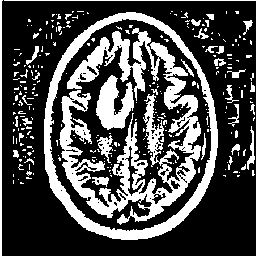

273


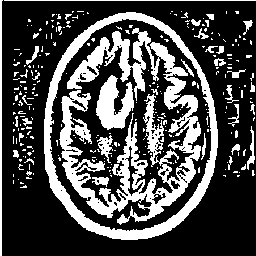

274


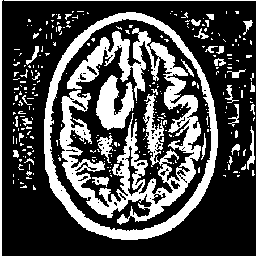

275


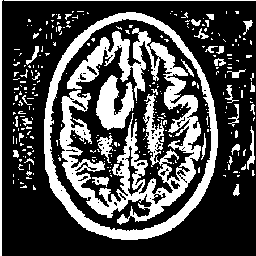

276


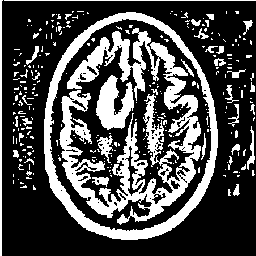

277


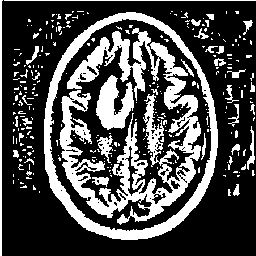

278


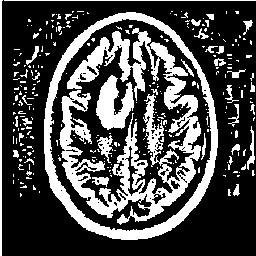

279


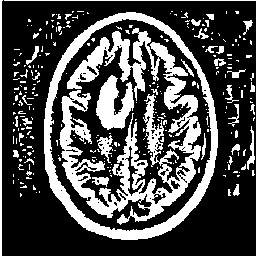

280


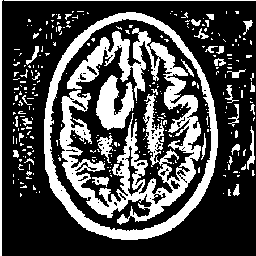

281


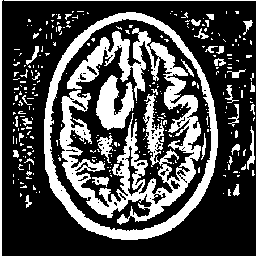

282


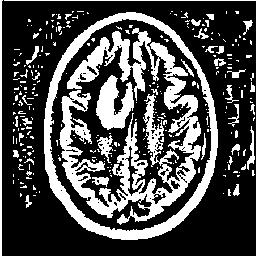

283


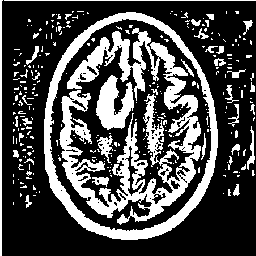

284


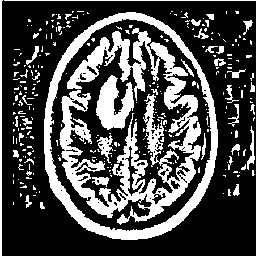

285


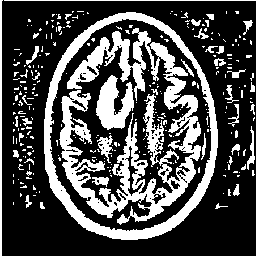

286


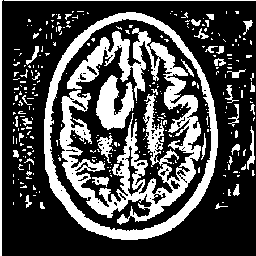

287


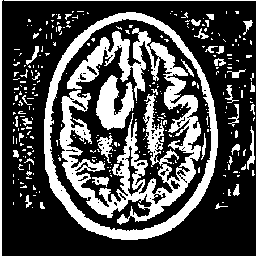

288


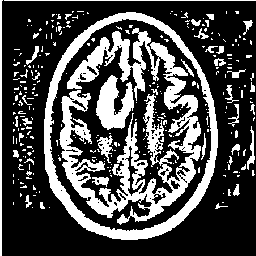

289


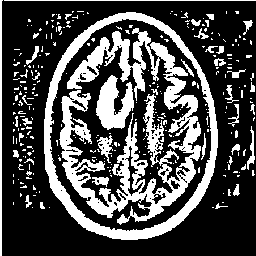

290


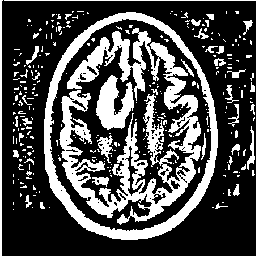

291


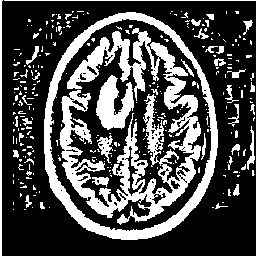

292


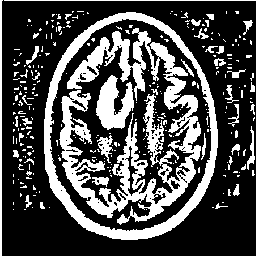

293


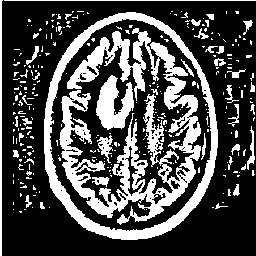

294


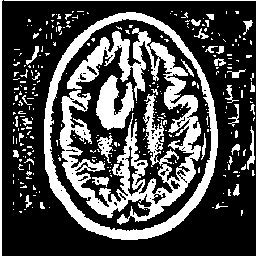

295


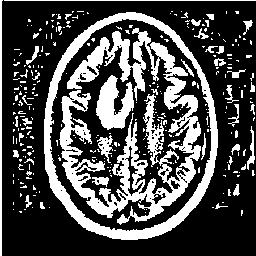

296


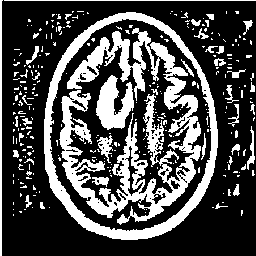

297


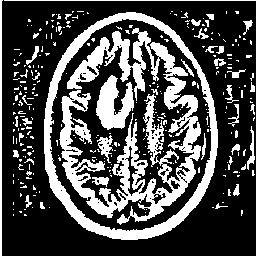

298


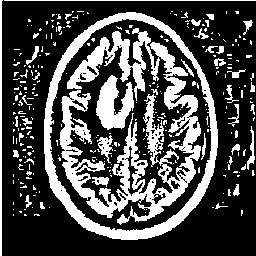

299


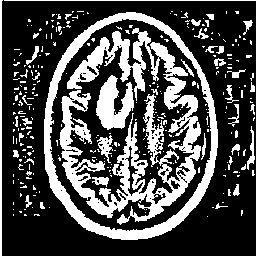

300


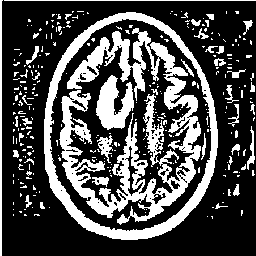

301


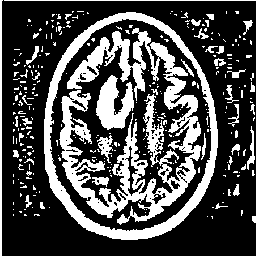

302


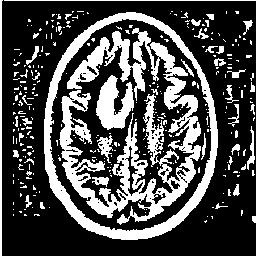

303


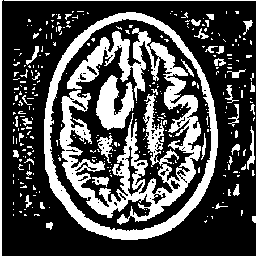

304


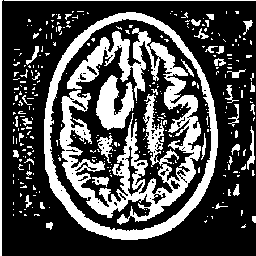

305


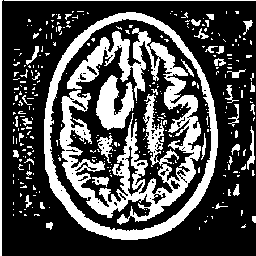

306


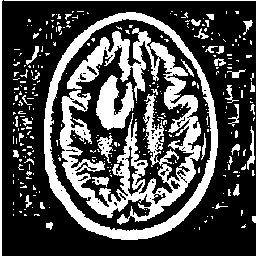

307


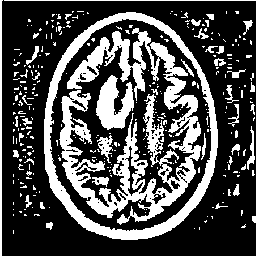

308


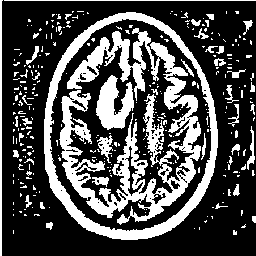

309


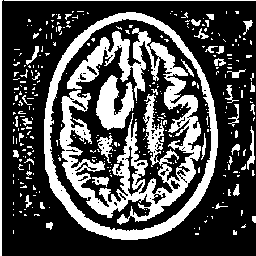

310


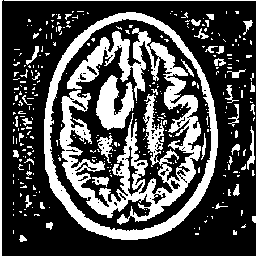

311


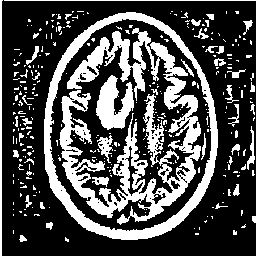

312


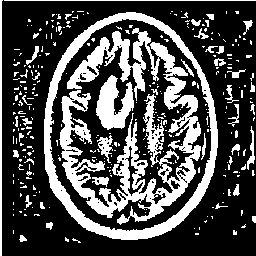

313


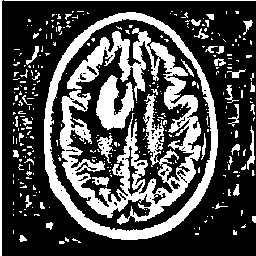

314


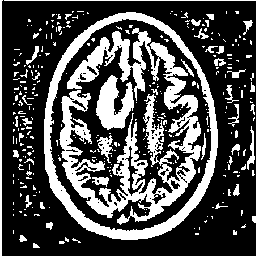

315


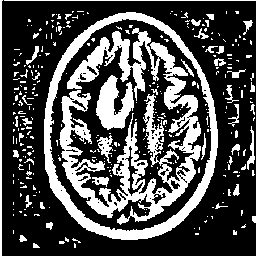

316


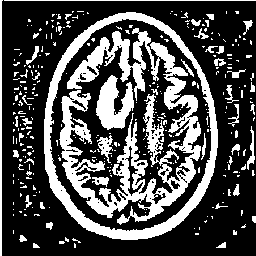

317


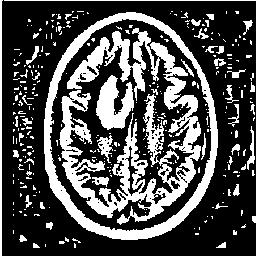

318


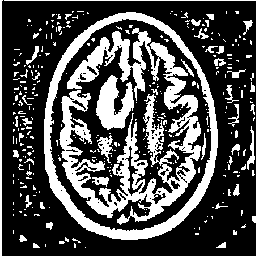

319


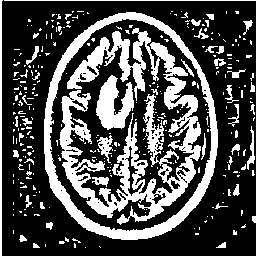

320


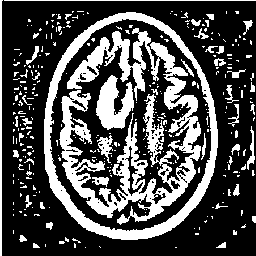

321


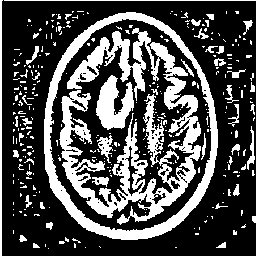

322


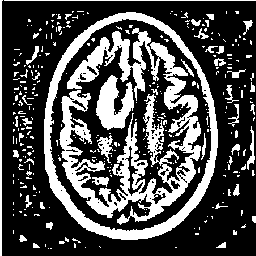

323


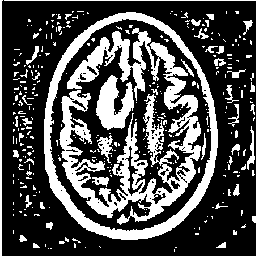

324


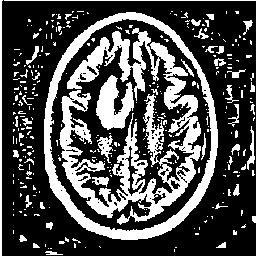

325


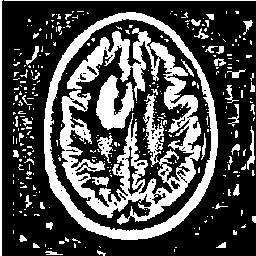

326


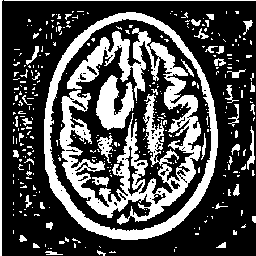

327


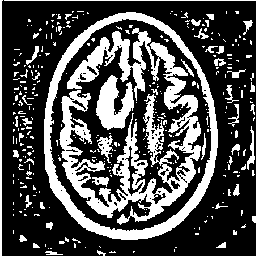

328


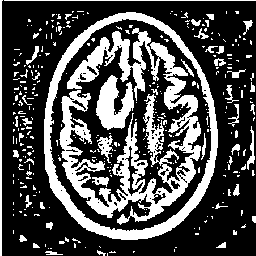

329


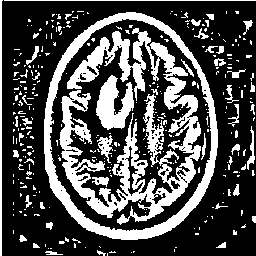

330


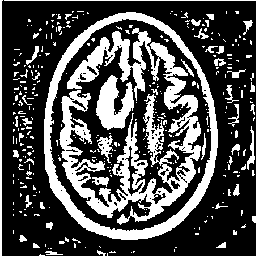

331


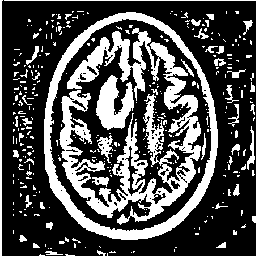

332


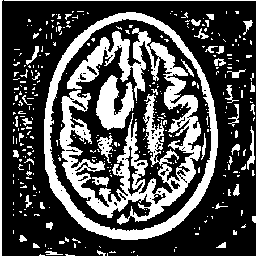

333


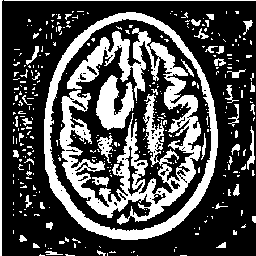

334


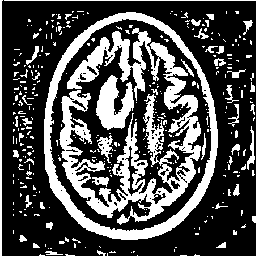

335


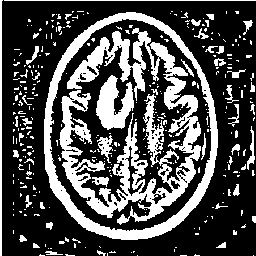

336


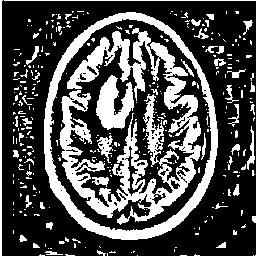

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#choosing ectracted skull from here
for i in range(len(index)):
  plt.figure(i)
  print(index[i])
  cv2_imshow(components[index[i],:,:])
  cv2.waitKey(0)

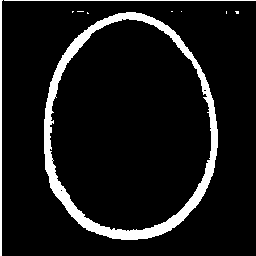

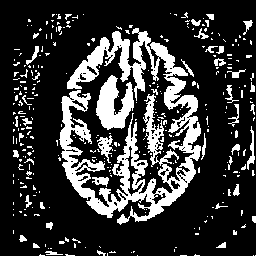

In [ ]:
#extracting the brain
skull = 10
cv2_imshow(components[skull,:,:])
brain = thresh - components[skull,:,:]
cv2_imshow(brain)

## Filtering and enhancement

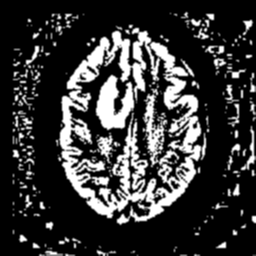

In [ ]:
#gaussian filter is used to smoothen the image and remove noise
image = cv2.GaussianBlur(brain, (3,3), 0)
cv2_imshow(image)

## Segmentation using Kmeans clustering algorithm

In [ ]:
# k means clustering
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)

k = 16 
_,labels,(centers) = cv2.kmeans(pixel_values,
                                k,
                                None,
                                criteria,
                                10,
                                cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

0


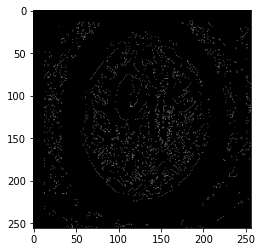

1


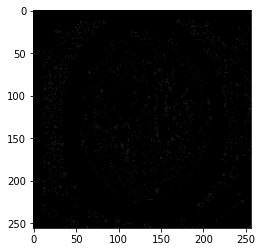

2


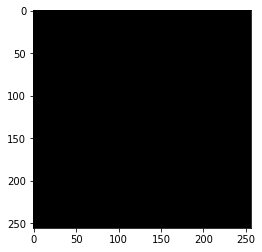

3


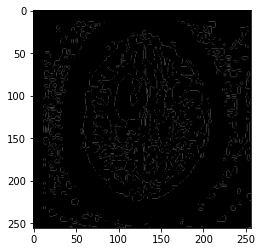

4


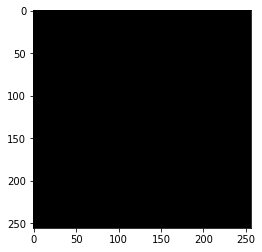

5


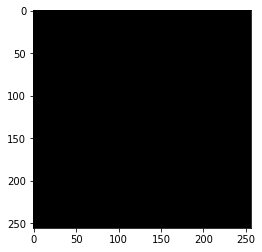

6


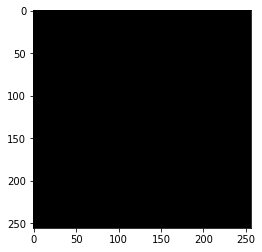

7


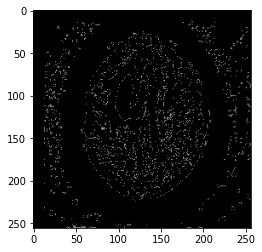

8


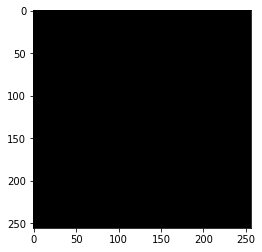

9


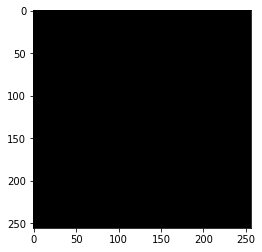

10


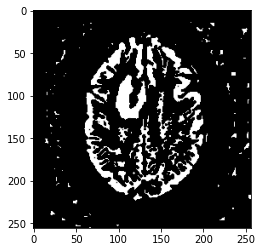

11


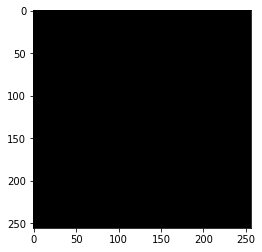

12


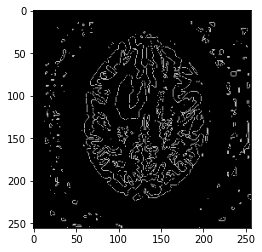

13


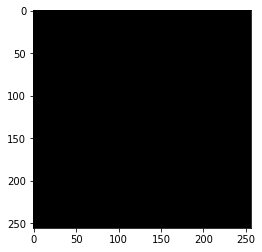

14


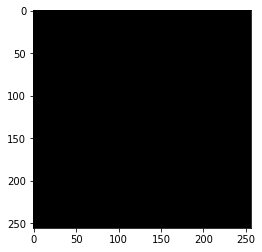

15


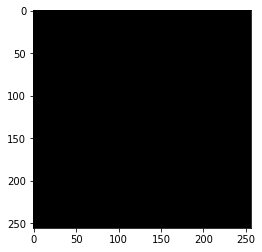

In [ ]:
#choosing the cluster with the tumor
for i in range(k):
  masked_image = np.copy(image)
  masked_image = masked_image.reshape((-1,3))
  extracted = np.copy(masked_image)
  cluster = i
  masked_image[labels == cluster] = [0,0,0]
  extracted[labels != cluster] = [0,0,0]
  masked_image = masked_image.reshape(image.shape)
  extracted = extracted.reshape(image.shape)

  print(i)
  plt.figure(i)
  plt.imshow(extracted)
  plt.show()

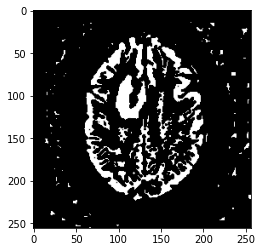

In [ ]:
cluster = 10

masked_image = np.copy(image)
masked_image = masked_image.reshape((-1,3))
extracted = np.copy(masked_image)
masked_image[labels == cluster] = [0,0,0]
extracted[labels != cluster] = [0,0,0]
masked_image = masked_image.reshape(image.shape)
extracted = extracted.reshape(image.shape)
image = extracted
# show the image
plt.figure
plt.imshow(image)
plt.show()

## Morphological operation

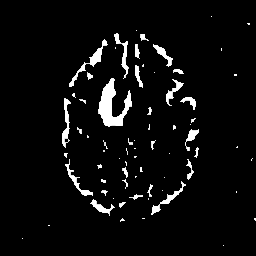

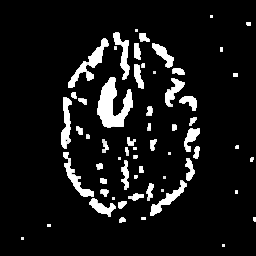

In [ ]:
#kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(image, None, iterations=1) 
dilated = cv2.dilate(eroded, None, iterations=1) 
cv2_imshow(eroded)
cv2_imshow(dilated)

## Tumor contouring

In [ ]:
#connected component analysis
gray = cv2.cvtColor(dilated, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 0, 255,	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#thresh = cv2.adaptiveThreshold(gray, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15,0)
connectivity = 8 
output = cv2.connectedComponentsWithStats(
	thresh, connectivity, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

In [ ]:
mask = np.zeros(gray.shape, dtype="uint8")

#looping over unique labels
x = np.zeros(numLabels)
y = np.zeros(numLabels)
h = np.zeros(numLabels)
w = np.zeros(numLabels)
area = np.zeros(numLabels)

for i in range(1, numLabels): #id 0  background
	# extract the connected component statistics for the current
	# label
	x[i] = stats[i, cv2.CC_STAT_LEFT]
	y[i] = stats[i, cv2.CC_STAT_TOP]
	w[i] = stats[i, cv2.CC_STAT_WIDTH]
	h[i] = stats[i, cv2.CC_STAT_HEIGHT]
	area[i] = stats[i, cv2.CC_STAT_AREA]

In [ ]:
components =np.zeros(((numLabels,image.shape[0],image.shape[1])),dtype = np.uint8)
index = []
for i in range(1,numLabels):
  keepWidth = w[i]>0
  keepHeight = h[i]>0
  keepArea = area[i]>0
  if all((keepWidth,keepHeight,keepArea)):
    componentMask = (labels == i).astype('uint8')*255
    mask = cv2.bitwise_or(mask,componentMask)
    components[i,:,:] = mask
    index.append(i)

1


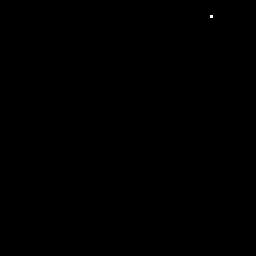

2


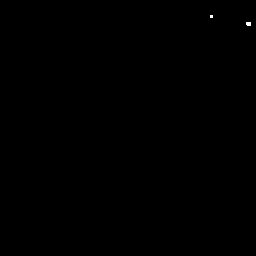

3


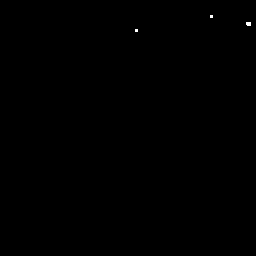

4


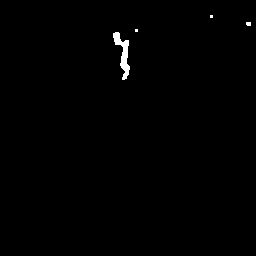

5


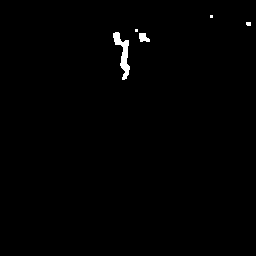

6


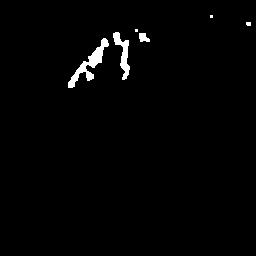

7


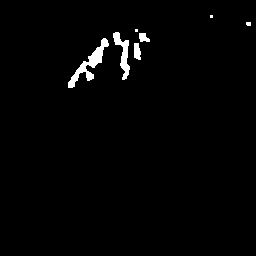

8


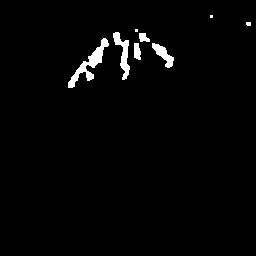

9


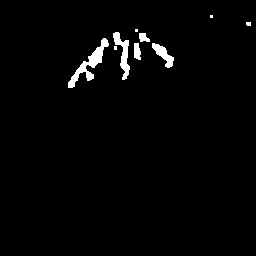

10


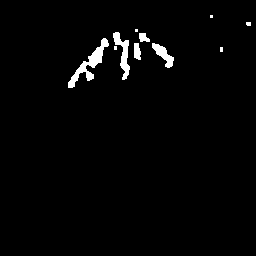

11


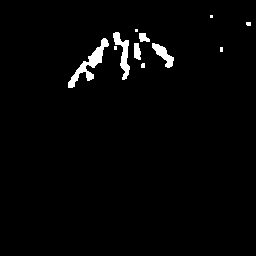

12


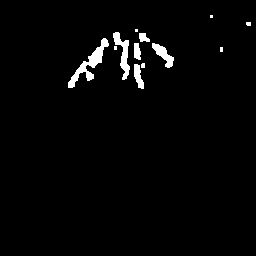

13


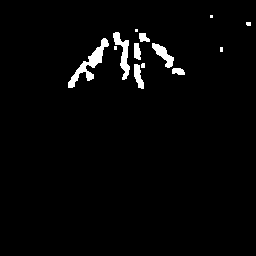

14


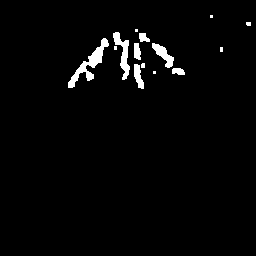

15


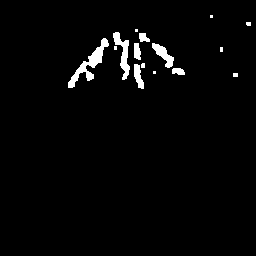

16


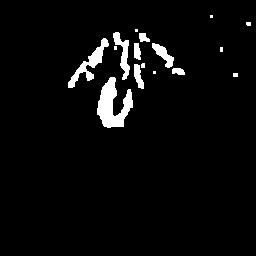

17


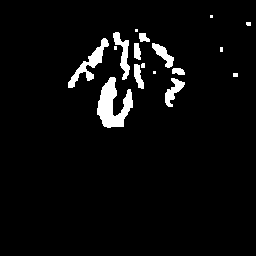

18


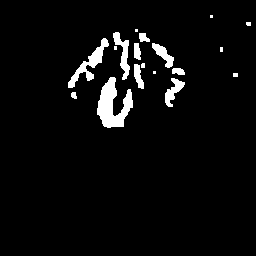

19


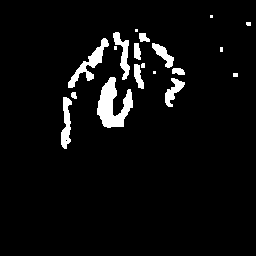

20


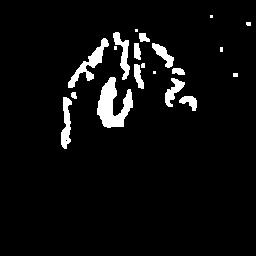

21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


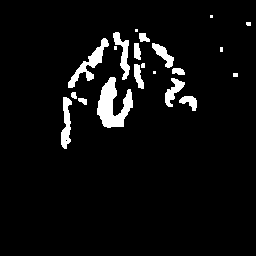

22


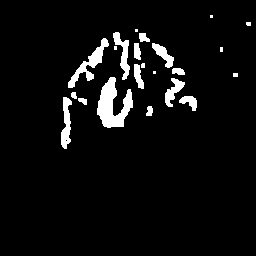

23


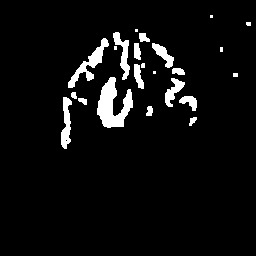

24


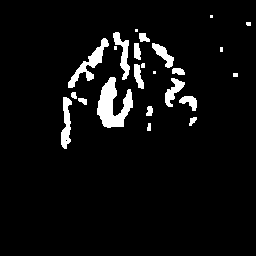

25


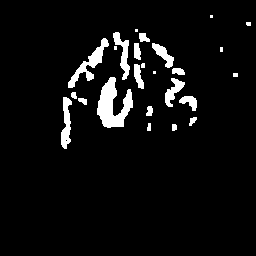

26


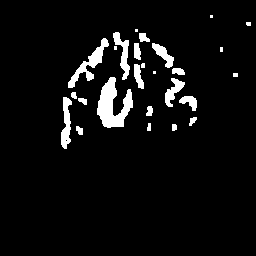

27


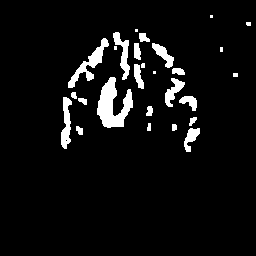

28


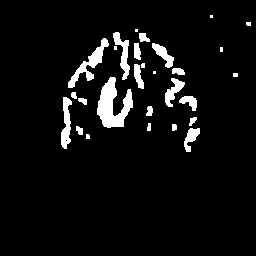

29


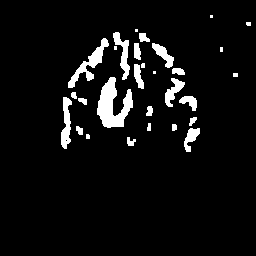

30


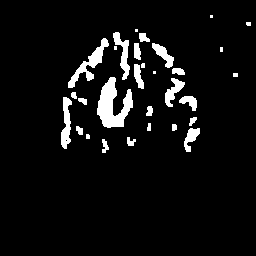

31


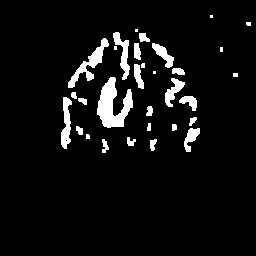

32


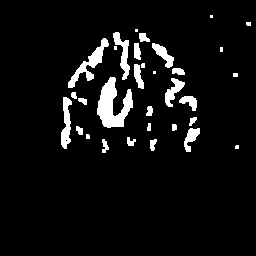

33


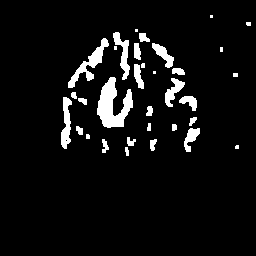

34


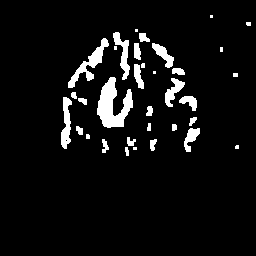

35


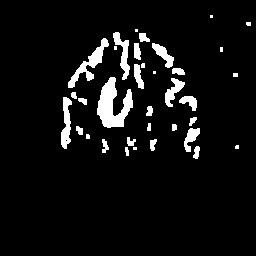

36


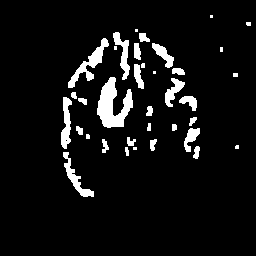

37


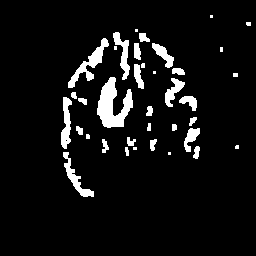

38


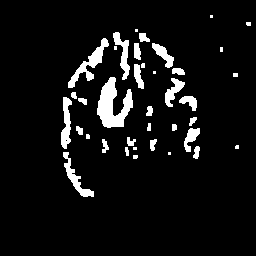

39


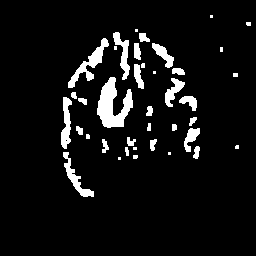

40


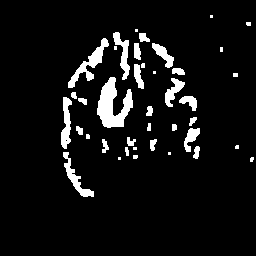

41


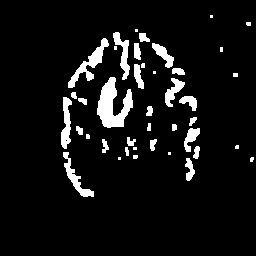

42


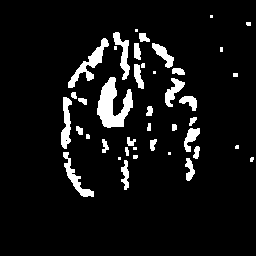

43


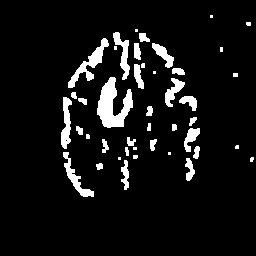

44


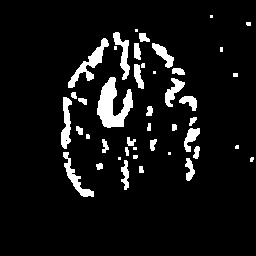

45


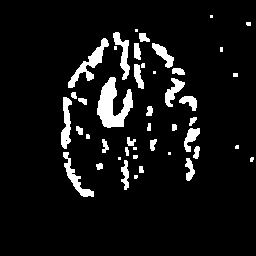

46


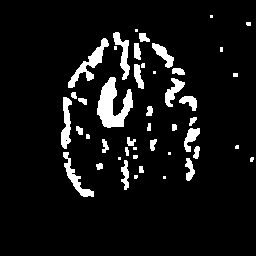

47


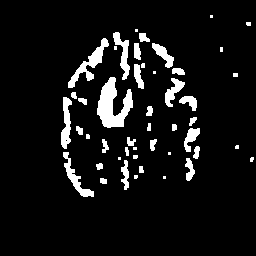

48


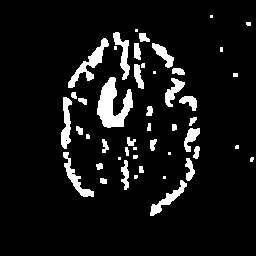

49


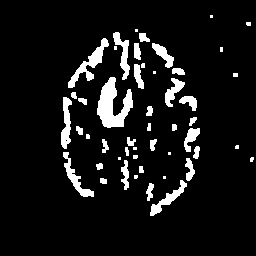

50


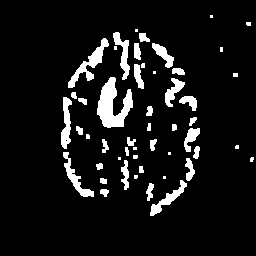

51


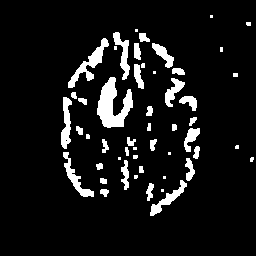

52


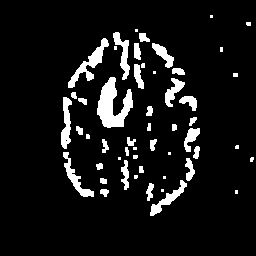

53


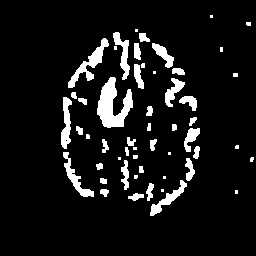

54


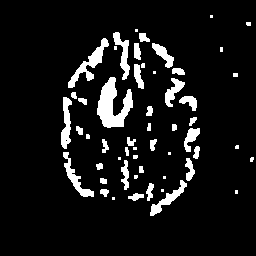

55


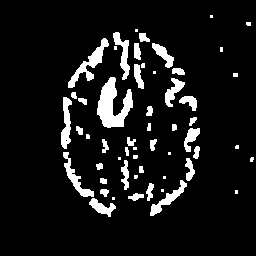

56


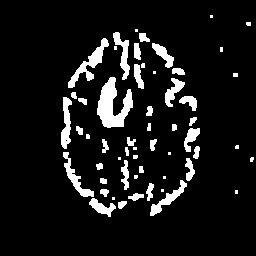

57


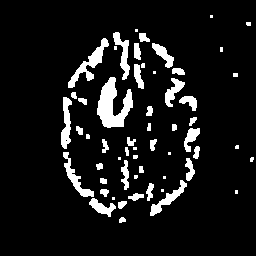

58


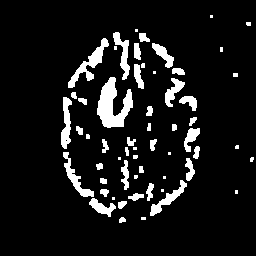

59


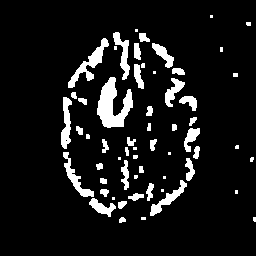

60


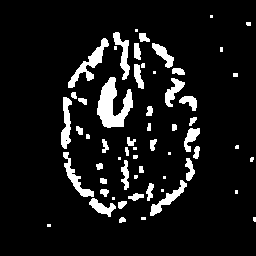

61


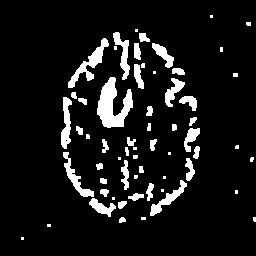

62


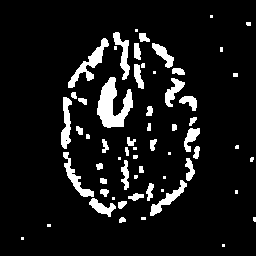

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#extracting tumor by subtractiong between two connected component analyzed images
for i in range(len(index)):
  plt.figure(i)
  print(index[i])
  cv2_imshow(components[index[i],:,:])
  cv2.waitKey(0)

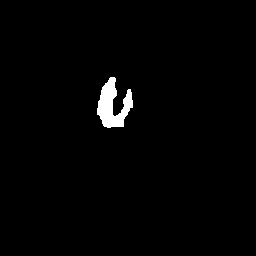

In [ ]:
first_tumor = 16
tumor = components[first_tumor,:,:] - components[first_tumor-1,:,:]
cv2_imshow(tumor)

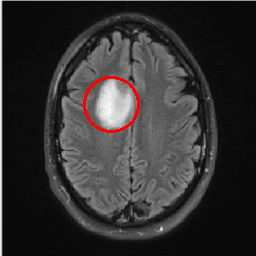

In [ ]:
#loading image again
img = cv2.imread(img_file)
dim = (256,256)
image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)


# find contours in thresholded image, then grab the largest one
import imutils
cnts = cv2.findContours(tumor.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

#finding out centroid
points = [list(extLeft),list(extRight),list(extTop),list(extBot)]
x = [p[0] for p in points]
y = [p[1] for p in points]
centroid = (sum(x) / len(points), sum(y) / len(points))

#radius
import numpy as np
dist = 0 
for i in range(len(x)):
  dist_ = np.sqrt((centroid[0]-x[i])**2 + (centroid[1]-y[i])**2)
  if dist_>dist:
    dist = dist_
radius = int(np.floor(dist))

center = (int(np.floor(centroid[0])),int(np.floor(centroid[1])))

#drawing circular contour
demo2 = image.copy()
a = cv2.circle(demo2, center, radius, (0, 0, 255), 2)
cv2_imshow(demo2)

# Preparing data for Feature Extraction

## preparing the dataset folders(only once)

take all the yes and no images into separate folders and extract features from them

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#counting files
import os,glob,shutil

os.chdir('/content/drive/MyDrive/Dataset_2/dataset/no/')
count = 0
for f in glob.glob("*"):
  count += 1

print(count)

98


In [ ]:
#no need to run

count = 0
dirpath = '/content/drive/MyDrive/Dataset_2/dataset/no/'

dim = (256,256)

os.chdir(dirpath)
filenames = os.listdir(dirpath)

dest_dir = '/content/drive/MyDrive/Dataset_2/ML_datasets/all_contour_no/256x256/'

for fname in filenames:
  img = cv2.imread(fname)
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  dest = dest_dir + fname
  cv2.imwrite(dest,img)
  print(count)
  count += 1

## creating csv files with all features


In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from google.colab.patches import cv2_imshow
%matplotlib inline

from scipy.stats import skew
import scipy.stats as stats

from scipy.stats import kurtosis

import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#load a file using opencv and give it as input in the following functions

from scipy.stats import skew
import scipy.stats as stats

from scipy.stats import kurtosis

def stat_features(mean,variance,std,skewness,img):
  im = img.flatten()

  m = np.mean(im)
  v = np.var(im)
  st = np.std(im)
  sk = np.absolute(skew(im))

  mean.append(m)
  variance.append(v)
  std.append(st)
  skewness.append(sk)

In [ ]:
#glcm features

def glcm_features(dissimilarity,correlation,asm,energy,homogeneity,contrast,gray_img):
  glcm = greycomatrix(gray_img, [5], [0], 256, symmetric=True, normed=True)

  dis = greycoprops(glcm, 'dissimilarity')[0, 0]
  corr = greycoprops(glcm, 'correlation')[0, 0]
  a = greycoprops(glcm, 'ASM')[0, 0]
  en = greycoprops(glcm, 'energy')[0, 0]
  hom = greycoprops(glcm, 'homogeneity')[0, 0]
  cont = greycoprops(glcm, 'contrast')[0, 0]

  dissimilarity.append(dis)
  correlation.append(corr)
  asm.append(a)
  energy.append(en)
  homogeneity.append(hom)
  contrast.append(cont)

In [ ]:
def coarseness(image, kmax):
	image = np.array(image)
	w = image.shape[0]
	h = image.shape[1]
	kmax = kmax if (np.power(2,kmax) < w) else int(np.log(w) / np.log(2))
	kmax = kmax if (np.power(2,kmax) < h) else int(np.log(h) / np.log(2))
	average_gray = np.zeros([kmax,w,h])
	horizon = np.zeros([kmax,w,h])
	vertical = np.zeros([kmax,w,h])
	Sbest = np.zeros([w,h])

	for k in range(kmax):
		window = np.power(2,k)
		for wi in range(w)[window:(w-window)]:
			for hi in range(h)[window:(h-window)]:
				average_gray[k][wi][hi] = np.sum(image[wi-window:wi+window, hi-window:hi+window])
		for wi in range(w)[window:(w-window-1)]:
			for hi in range(h)[window:(h-window-1)]:
				horizon[k][wi][hi] = average_gray[k][wi+window][hi] - average_gray[k][wi-window][hi]
				vertical[k][wi][hi] = average_gray[k][wi][hi+window] - average_gray[k][wi][hi-window]
		horizon[k] = horizon[k] * (1.0 / np.power(2, 2*(k+1)))
		vertical[k] = horizon[k] * (1.0 / np.power(2, 2*(k+1)))

	for wi in range(w):
		for hi in range(h):
			h_max = np.max(horizon[:,wi,hi])
			h_max_index = np.argmax(horizon[:,wi,hi])
			v_max = np.max(vertical[:,wi,hi])
			v_max_index = np.argmax(vertical[:,wi,hi])
			index = h_max_index if (h_max > v_max) else v_max_index
			Sbest[wi][hi] = np.power(2,index)

	fcrs = np.mean(Sbest)
	return fcrs

In [ ]:
def directionality(image):
	image = np.array(image, dtype = 'int64')
	h = image.shape[0]
	w = image.shape[1]
	convH = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
	convV = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
	deltaH = np.zeros([h,w])
	deltaV = np.zeros([h,w])
	theta = np.zeros([h,w])

	# calc for deltaH
	for hi in range(h)[1:h-1]:
		for wi in range(w)[1:w-1]:
			deltaH[hi][wi] = np.sum(np.multiply(image[hi-1:hi+2, wi-1:wi+2], convH))
	for wi in range(w)[1:w-1]:
		deltaH[0][wi] = image[0][wi+1] - image[0][wi]
		deltaH[h-1][wi] = image[h-1][wi+1] - image[h-1][wi]
	for hi in range(h):
		deltaH[hi][0] = image[hi][1] - image[hi][0]
		deltaH[hi][w-1] = image[hi][w-1] - image[hi][w-2]

	# calc for deltaV
	for hi in range(h)[1:h-1]:
		for wi in range(w)[1:w-1]:
			deltaV[hi][wi] = np.sum(np.multiply(image[hi-1:hi+2, wi-1:wi+2], convV))
	for wi in range(w):
		deltaV[0][wi] = image[1][wi] - image[0][wi]
		deltaV[h-1][wi] = image[h-1][wi] - image[h-2][wi]
	for hi in range(h)[1:h-1]:
		deltaV[hi][0] = image[hi+1][0] - image[hi][0]
		deltaV[hi][w-1] = image[hi+1][w-1] - image[hi][w-1]

	deltaG = (np.absolute(deltaH) + np.absolute(deltaV)) / 2.0
	deltaG_vec = np.reshape(deltaG, (deltaG.shape[0] * deltaG.shape[1]))

	# calc the theta
	for hi in range(h):
		for wi in range(w):
			if (deltaH[hi][wi] == 0 and deltaV[hi][wi] == 0):
				theta[hi][wi] = 0;
			elif(deltaH[hi][wi] == 0):
				theta[hi][wi] = np.pi
			else:
				theta[hi][wi] = np.arctan(deltaV[hi][wi] / deltaH[hi][wi]) + np.pi / 2.0
	theta_vec = np.reshape(theta, (theta.shape[0] * theta.shape[1]))

	n = 16
	t = 12
	cnt = 0
	hd = np.zeros(n)
	dlen = deltaG_vec.shape[0]
	for ni in range(n):
		for k in range(dlen):
			if((deltaG_vec[k] >= t) and (theta_vec[k] >= (2*ni-1) * np.pi / (2 * n)) and (theta_vec[k] < (2*ni+1) * np.pi / (2 * n))):
				hd[ni] += 1
	hd = hd / np.mean(hd)
	hd_max_index = np.argmax(hd)
	fdir = 0
	for ni in range(n):
		fdir += np.power((ni - hd_max_index), 2) * hd[ni]
	return fdir

In [ ]:
def roughness(fcrs, fcon):
	return fcrs + fcon

In [ ]:
#creating list for all of the features
import os,glob
count = 0
dirpath = '/content/drive/MyDrive/Dataset_2/ML_datasets/all_contour_yes/224x224/'

os.chdir(dirpath)
filenames = os.listdir(dirpath)

dissimilarity = []
correlation = []
asm = []
energy = []
homogeneity = []
contrast = []

mean = []
std = []
skewness = []
variance = []

fcrs = []
fr = []
fdir = []

image_title = []
image_label = []


for fname in filenames:
  image_title.append(fname)
  image_label.append(1)

  
  img = cv2.imread(fname)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  stat_features(mean,variance,std,skewness,img)
  glcm_features(dissimilarity,correlation,asm,energy,homogeneity,contrast,gray_img)

  fcrs.append(coarseness(gray_img, 5))
  fr.append(roughness(fcrs[count], contrast[count]))
  fdir.append(directionality(gray_img))

  print(count)
  count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154


In [ ]:
dirpath = '/content/drive/MyDrive/Dataset_2/ML_datasets/all_contour_no/224x224/'

os.chdir(dirpath)
filenames = os.listdir(dirpath)

for fname in filenames:
  image_title.append(fname)
  image_label.append(0)


  img = cv2.imread(fname)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  stat_features(mean,variance,std,skewness,img)
  glcm_features(dissimilarity,correlation,asm,energy,homogeneity,contrast,gray_img)

  fcrs.append(coarseness(gray_img, 5))
  fr.append(roughness(fcrs[count], contrast[count]))
  fdir.append(directionality(gray_img))

  print(count)
  count += 1

155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252


In [ ]:
#for identifying negative values in features
#the training won't work for negative values
(np.array(skewness) < 0).any()

False

In [ ]:
# Import packages
import numpy as np
import pandas as pd# Update default settings to show 2 decimal place
pd.options.display.float_format = '{:.2f}'.format# Create a small dataframe
df = pd.DataFrame({'Image': image_title,
                   'Class': image_label,
                   'Mean': mean,
                   'Standard Deviation': std,
                   'Variance': variance,
                   'Skewness': skewness,
                   'Contrast': contrast,
                   'Homogeneity': homogeneity,
                   'Energy': energy,
                   'ASM': asm,
                   'Correlation': correlation,
                   'Dissimilarity': dissimilarity,
                   #'Roughness': fr,
                   #'coarseness': fcrs,
                   'Directionality':fdir ,
                   })
df

,Image,Class,Mean,Standard Deviation,Variance,Skewness,Contrast,Homogeneity,Energy,ASM,Correlation,Dissimilarity,Directionality
0,Y62.png,1,37.97,41.86,1752.62,1.33,1181.18,0.29,0.10,0.01,0.63,16.36,287.28
1,Y64.png,1,63.39,62.66,3926.04,0.58,2007.88,0.33,0.28,0.08,0.73,23.33,331.88
2,Y68.png,1,44.65,40.41,1632.79,0.87,793.93,0.21,0.07,0.01,0.73,14.46,300.52
3,Y71.png,1,67.60,55.19,3046.11,0.75,1215.17,0.24,0.11,0.01,0.79,18.68,342.26
4,Y73.png,1,45.56,56.16,3154.18,1.53,1124.57,0.31,0.24,0.06,0.82,18.12,391.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,21 no.jpg,0,48.05,56.53,3195.70,1.42,1428.90,0.38,0.21,0.04,0.78,19.57,300.72
249,no 1.jpg,0,29.74,35.44,1256.32,1.17,943.45,0.37,0.20,0.04,0.63,14.93,307.34
250,46 no.jpg,0,56.21,66.73,4453.45,0.68,1355.42,0.48,0.44,0.19,0.85,18.06,1155.65
251,no 89.jpg,0,36.87,37.80,1429.12,0.54,474.82,0.31,0.13,0.02,0.83,10.48,285.73


In [ ]:
df.head()

,Image,Class,Mean,Standard Deviation,Variance,Skewness,Contrast,Homogeneity,Energy,ASM,Correlation,Dissimilarity,Directionality
0,Y62.png,1,37.97,41.86,1752.62,1.33,1181.18,0.29,0.10,0.01,0.63,16.36,287.28
1,Y64.png,1,63.39,62.66,3926.04,0.58,2007.88,0.33,0.28,0.08,0.73,23.33,331.88
2,Y68.png,1,44.65,40.41,1632.79,0.87,793.93,0.21,0.07,0.01,0.73,14.46,300.52
3,Y71.png,1,67.60,55.19,3046.11,0.75,1215.17,0.24,0.11,0.01,0.79,18.68,342.26
4,Y73.png,1,45.56,56.16,3154.18,1.53,1124.57,0.31,0.24,0.06,0.82,18.12,391.87


In [ ]:
df.columns

Index(['Image', 'Class', 'Mean', 'Standard Deviation', 'Variance', 'Skewness',
       'Contrast', 'Homogeneity', 'Energy', 'ASM', 'Correlation',
       'Dissimilarity', 'Directionality'],
      dtype='object')

In [ ]:
# saving the dataframe
df.to_csv('/content/drive/MyDrive/Dataset_2/ML_datasets/feature_224x224.csv')